In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Supplementary data 1.csv')

In [ ]:
df.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    object 
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    object 
 13  CA19-9      325 non-null    object 
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [ ]:
df.shape

(349, 51)

**Data Preprocessing and cleaning**

In [ ]:
# Clean column names by stripping whitespace and special characters
df.columns = df.columns.str.strip().str.replace('\t', '')
print(df.columns.tolist())

['SUBJECT_ID', 'AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN', 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'TYPE', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA']


In [ ]:
# Clean and convert columns which were strings but should have been numeric (AFP, CA125, CA19-9)
for col in ['AFP', 'CA125', 'CA19-9']:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]+', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Remove irrelevant columns
df = df.drop('SUBJECT_ID', axis=1)

**Handling missing values**

In [ ]:
df.isnull().sum() # Find missing values

,0
AFP,22
AG,1
Age,0
ALB,10
ALP,10
ALT,10
AST,10
BASO#,0
BASO%,0
BUN,0


In [ ]:
df.describe() # To see data characteristics

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
count,327.000000,348.000000,349.000000,339.000000,339.000000,339.000000,339.000000,349.000000,349.000000,349.000000,...,258.000000,347.000000,347.000000,349.000000,349.000000,349.000000,349.000000,339.000000,339.000000,349.000000
mean,11.822875,19.320517,45.051576,41.076991,77.085546,18.011799,19.106195,0.028883,0.479771,4.011117,...,66.575543,0.251458,14.330490,1.120602,255.432665,4.359513,13.549914,9.089676,71.078761,243.706590
std,98.231126,4.348675,15.130949,5.686780,44.375700,11.243664,8.495069,0.020890,0.346230,1.285569,...,11.612845,0.085308,3.000556,0.187649,95.241974,0.465894,1.802818,4.164891,7.365056,68.581936
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,...,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000
25%,1.620000,17.287500,33.000000,38.300000,60.000000,11.000000,13.500000,0.010000,0.200000,3.160000,...,58.755000,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.200000,67.450000,200.100000
50%,2.280000,19.850000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,...,66.750000,0.240000,13.700000,1.120000,236.000000,4.370000,13.100000,8.400000,72.500000,235.400000
75%,3.455000,22.177500,57.000000,45.300000,87.000000,21.000000,22.000000,0.040000,0.700000,4.780000,...,74.975000,0.300000,16.850000,1.240000,292.000000,4.660000,14.400000,10.750000,75.950000,276.600000
max,1210.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,...,92.000000,0.690000,22.800000,1.750000,868.000000,6.740000,22.200000,38.300000,86.800000,632.000000


In [ ]:
# Get the list of columns with missing values before imputation
cols_with_missing_before_imputation = ['AFP', 'AG', 'ALB', 'ALP', 'ALT', 'AST', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CO2CP', 'DBIL', 'GGT', 'GLO', 'HE4', 'IBIL', 'MPV', 'NEU', 'PCT', 'PDW', 'TBIL', 'TP']

# Display descriptive statistics for columns that had missing values
print("Descriptive statistics for columns that had missing values before imputation:")
display(df[cols_with_missing_before_imputation].describe())

Descriptive statistics for columns that had missing values before imputation:


,AFP,AG,ALB,ALP,ALT,AST,CA125,CA19-9,CA72-4,CEA,...,GGT,GLO,HE4,IBIL,MPV,NEU,PCT,PDW,TBIL,TP
count,327.000000,348.000000,339.000000,339.000000,339.000000,339.000000,332.000000,325.000000,109.000000,327.000000,...,339.000000,339.000000,329.000000,339.000000,347.000000,258.000000,347.000000,347.000000,339.000000,339.000000
mean,11.822875,19.320517,41.076991,77.085546,18.011799,19.106195,350.382681,46.733938,10.173394,3.309083,...,21.312684,30.176696,183.948967,5.961062,10.039481,66.575543,0.251458,14.330490,9.089676,71.078761
std,98.231126,4.348675,5.686780,44.375700,11.243664,8.495069,796.488080,125.905844,25.232650,11.037197,...,18.170043,4.545036,380.372693,2.953268,1.738808,11.612845,0.085308,3.000556,4.164891,7.365056
min,0.610000,6.200000,22.000000,26.000000,4.000000,7.000000,3.750000,0.600000,0.200000,0.200000,...,4.000000,14.100000,16.710000,1.000000,5.060000,37.200000,0.070000,8.800000,2.500000,32.900000
25%,1.620000,17.287500,38.300000,60.000000,11.000000,13.500000,19.160000,7.810000,1.060000,0.830000,...,12.000000,27.000000,42.200000,4.000000,9.090000,58.755000,0.192000,11.900000,6.200000,67.450000
50%,2.280000,19.850000,42.000000,71.000000,15.000000,17.000000,44.675000,14.200000,2.370000,1.330000,...,16.000000,30.100000,53.270000,5.400000,10.300000,66.750000,0.240000,13.700000,8.400000,72.500000
75%,3.455000,22.177500,45.300000,87.000000,21.000000,22.000000,248.075000,30.940000,6.420000,2.065000,...,23.000000,32.800000,130.600000,7.300000,11.200000,74.975000,0.300000,16.850000,10.750000,75.950000
max,1210.000000,33.330000,51.500000,763.000000,86.000000,78.000000,5000.000000,1000.000000,158.500000,138.800000,...,176.000000,47.600000,3537.600000,28.400000,14.500000,92.000000,0.690000,22.800000,38.300000,86.800000


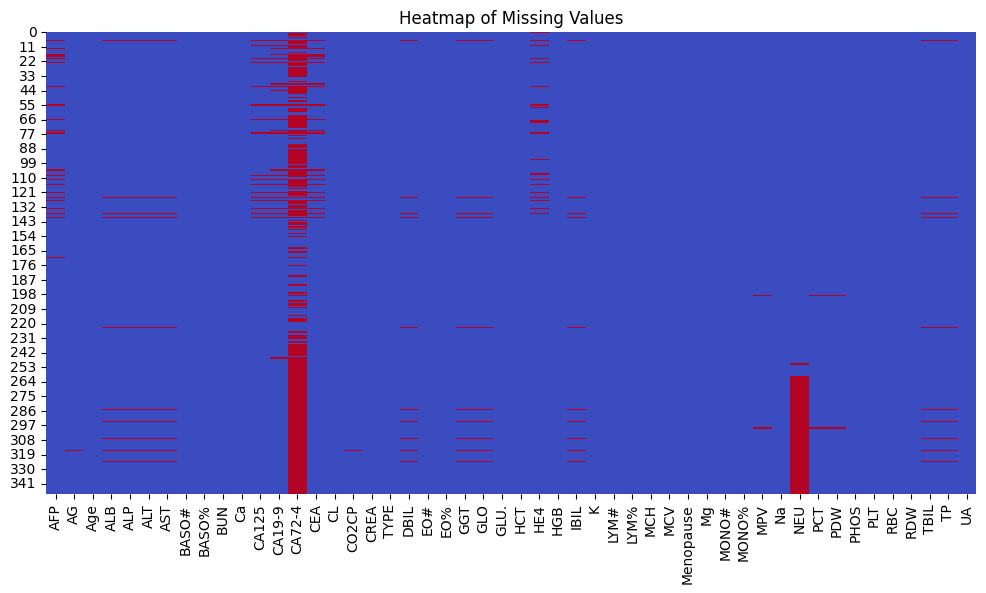

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
# Identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Separate columns for different missing imputation
impute_with_mean = ['NEU', 'TP', 'GGT', 'IBIL', 'DBIL', 'GLO', 'TBIL', 'ALP']
impute_with_median = ['CA125', 'AG', 'CO2CP', 'MPV', 'PCT', 'PDW', 'CA19-9', 'AFP', 'CEA', 'HE4', 'ALB', 'AST', 'ALT']

# Impute missing values
for col in impute_with_mean:
    if col in cols_with_missing:
        df[col] = df[col].fillna(df[col].mean())

for col in impute_with_median:
     if col in cols_with_missing:
        df[col] = df[col].fillna(df[col].median())

# Check remaining missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values after imputation:", missing_summary[missing_summary > 0])

Missing values after imputation: CA72-4    240
dtype: int64


In [ ]:
df.describe() # to see what to do with CA72-4

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,11.221318,19.322034,45.051576,41.103438,77.085546,17.925501,19.045845,0.028883,0.479771,4.011117,...,66.575543,0.251393,14.326877,1.120602,255.432665,4.359513,13.549914,9.089676,71.078761,243.706590
std,95.103794,4.342515,15.130949,5.606599,43.733470,11.092358,8.379516,0.020890,0.346230,1.285569,...,9.979656,0.085067,2.992301,0.187649,95.241974,0.465894,1.802818,4.104614,7.258465,68.581936
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,...,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000
25%,1.670000,17.300000,33.000000,38.500000,60.000000,11.000000,14.000000,0.010000,0.200000,3.160000,...,62.300000,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.300000,67.500000,200.100000
50%,2.280000,19.850000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,...,66.575543,0.240000,13.700000,1.120000,236.000000,4.370000,13.100000,8.600000,72.200000,235.400000
75%,3.270000,22.160000,57.000000,45.100000,86.000000,20.000000,22.000000,0.040000,0.700000,4.780000,...,71.300000,0.300000,16.800000,1.240000,292.000000,4.660000,14.400000,10.700000,75.800000,276.600000
max,1210.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,...,92.000000,0.690000,22.800000,1.750000,868.000000,6.740000,22.200000,38.300000,86.800000,632.000000


**EDA of CA72-4**

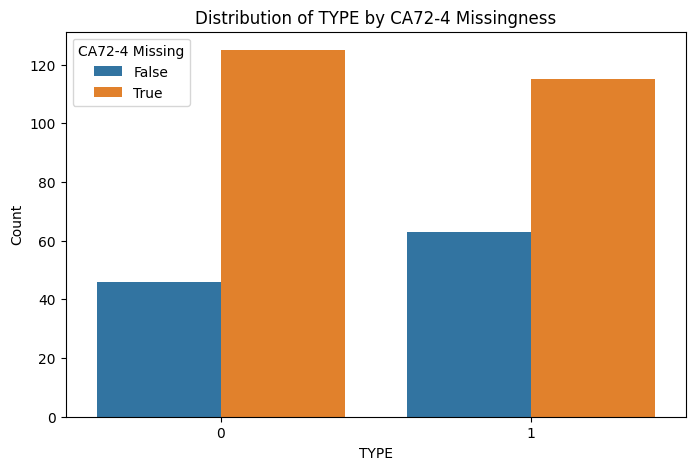

In [ ]:
# Distribution of the target variable 'TYPE' to see effect of the 'CA72-4' feature missing or not missing
df['CA72-4_missing'] = df['CA72-4'].isnull()

# Distribution plot of 'TYPE' for rows with and without missing 'CA72-4'
plt.figure(figsize=(8, 5))
sns.countplot(x='TYPE', hue='CA72-4_missing', data=df)
plt.title('Distribution of TYPE by CA72-4 Missingness')
plt.xlabel('TYPE')
plt.ylabel('Count')
plt.legend(title='CA72-4 Missing')
plt.show()


In [ ]:
# Create temporary columns for correlation calculation
df['CA72-4_missing_int'] = df['CA72-4_missing'].astype(int)

# Calculate correlation with other columns
correlation_with_CA72_4_missing = df.corr()['CA72-4_missing_int'].sort_values(ascending=False)

# Display correlations
print("\nCorrelation of CA72-4 Missingness with other features:")
print(correlation_with_CA72_4_missing.drop(['CA72-4_missing', 'CA72-4_missing_int']))

# Drop the temporary columns
df = df.drop(['CA72-4_missing', 'CA72-4_missing_int'], axis=1)


Correlation of CA72-4 Missingness with other features:
MPV          0.622071
PCT          0.362529
Na           0.312656
AST          0.268957
HCT          0.168858
RBC          0.163689
NEU          0.150970
Age          0.129153
TBIL         0.124123
PHOS         0.122599
IBIL         0.122310
ALB          0.116260
DBIL         0.108537
GLU.         0.096566
ALP          0.094465
HGB          0.089655
Menopause    0.080424
CO2CP        0.078720
TP           0.075924
CL           0.073219
UA           0.062503
EO%          0.046175
EO#          0.045348
PLT          0.039796
MCV          0.001590
AG          -0.009422
GGT         -0.028778
BUN         -0.030574
Ca          -0.033781
GLO         -0.036792
CA19-9      -0.050148
AFP         -0.054043
CA125       -0.054300
ALT         -0.065375
LYM#        -0.069502
CEA         -0.071958
HE4         -0.081750
MCH         -0.083467
TYPE        -0.091608
LYM%        -0.109691
MONO#       -0.111398
Mg          -0.153055
MONO%       -0.20223

In [ ]:
# Drop the 'CA72-4' column due to the high number of missing values and relatively low correlations
df = df.drop('CA72-4', axis=1)

In [ ]:
df.isnull().sum() # Confirm no missing values

,0
AFP,0
AG,0
Age,0
ALB,0
ALP,0
ALT,0
AST,0
BASO#,0
BASO%,0
BUN,0


**Further EDA of Features**

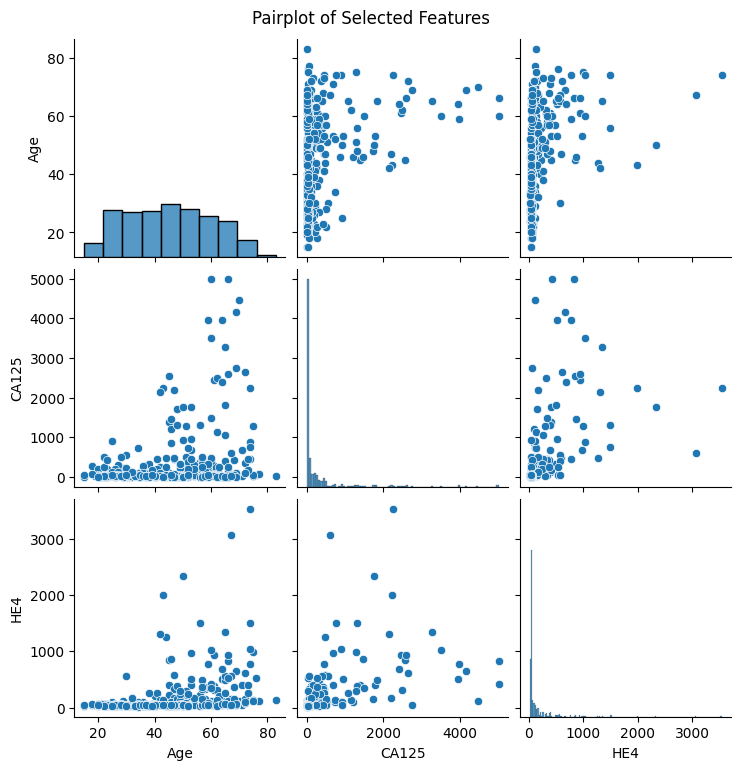

In [ ]:
import matplotlib.pyplot as plt
# Pairplot for a subset of the main risks to see relationships and distributions
features_for_pairplot = ['Age', 'CA125', 'HE4']
sns.pairplot(df[features_for_pairplot])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

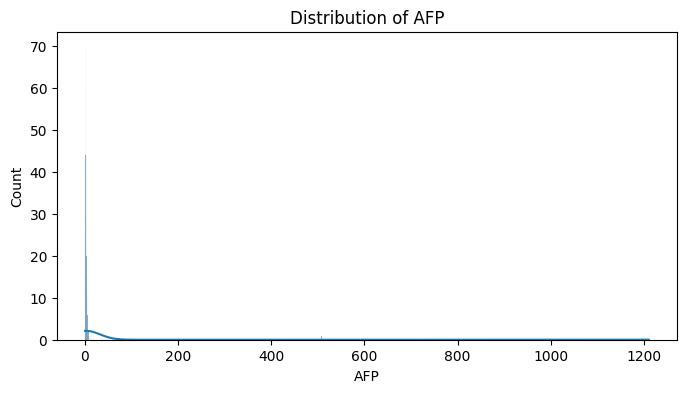

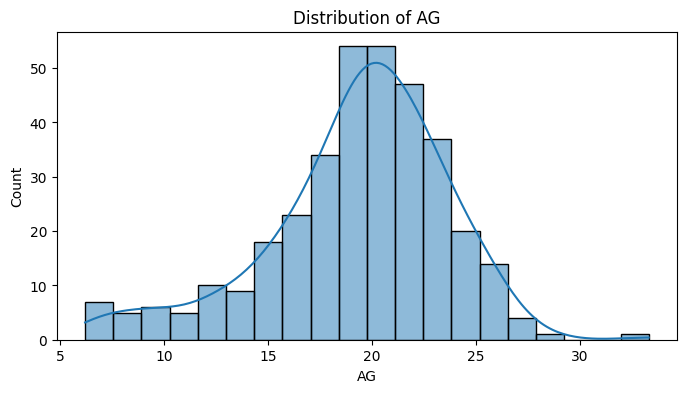

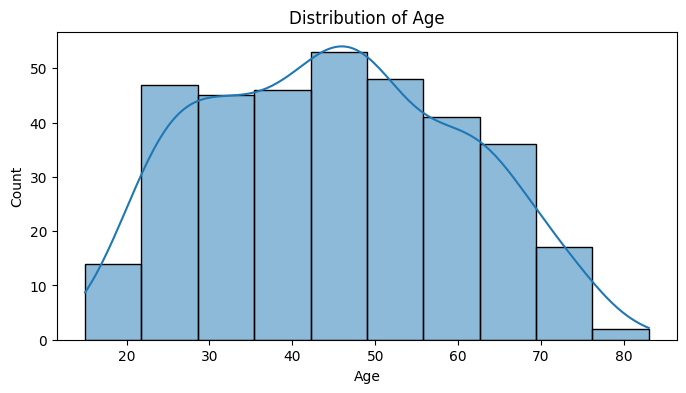

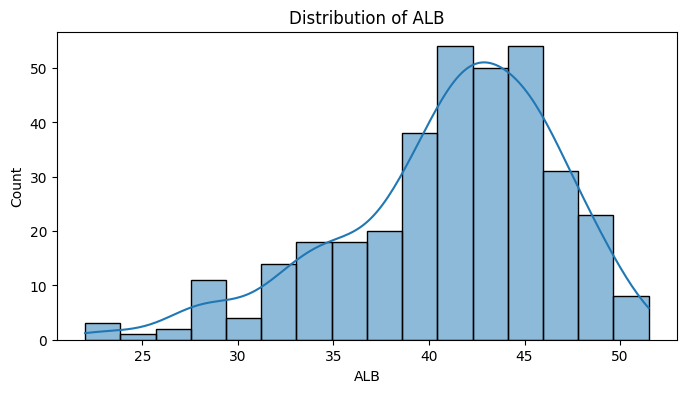

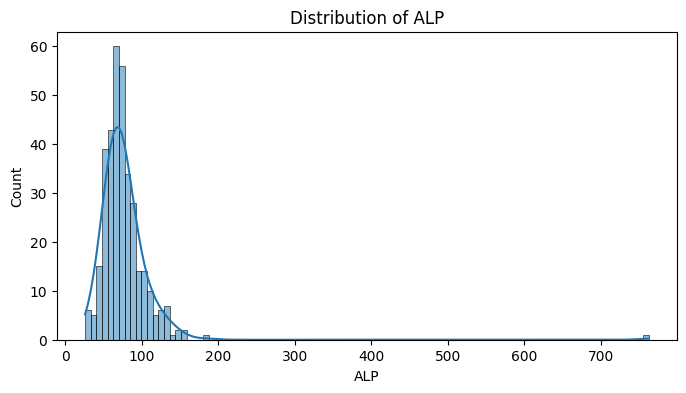

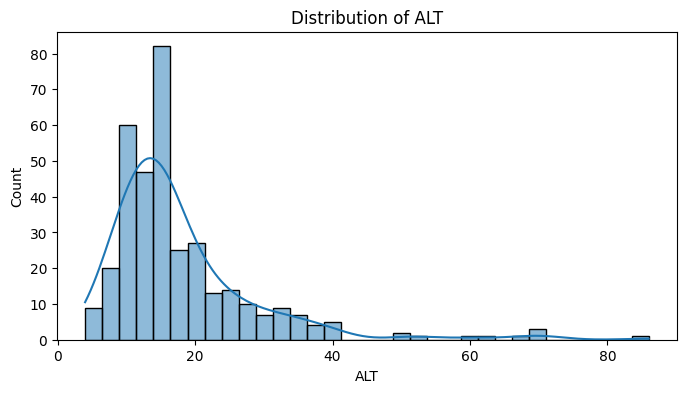

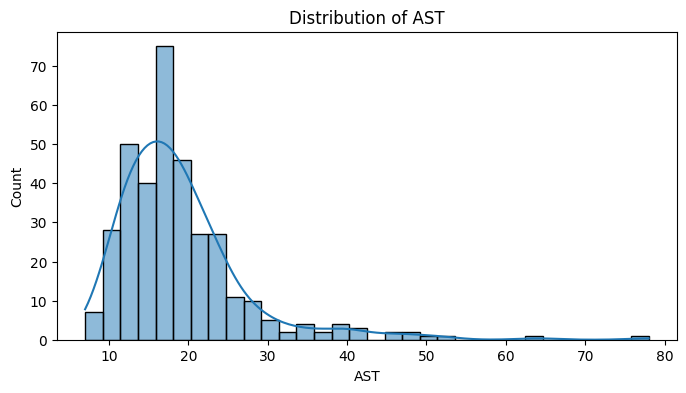

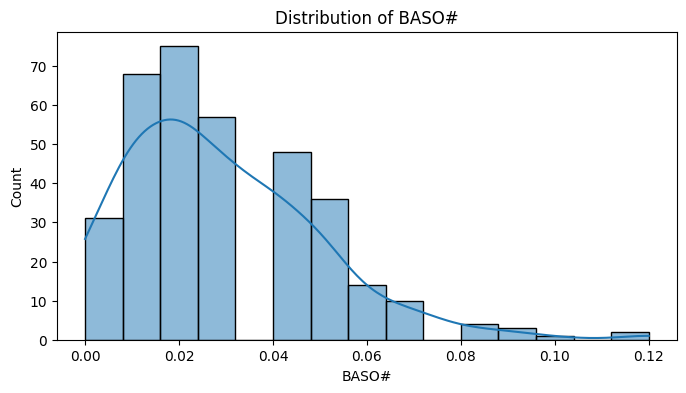

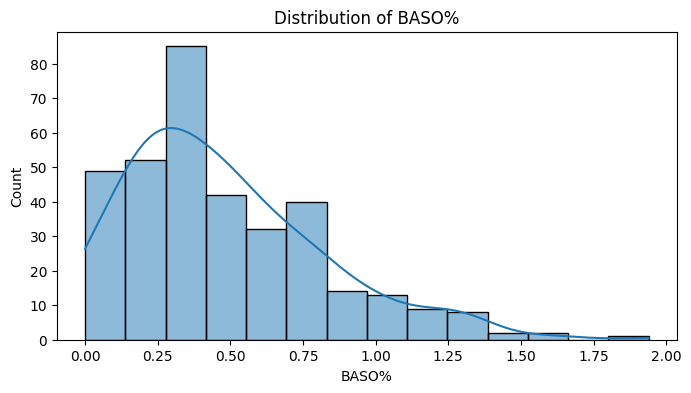

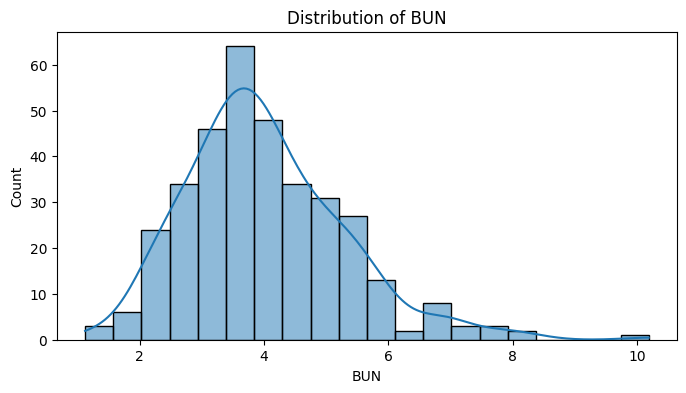

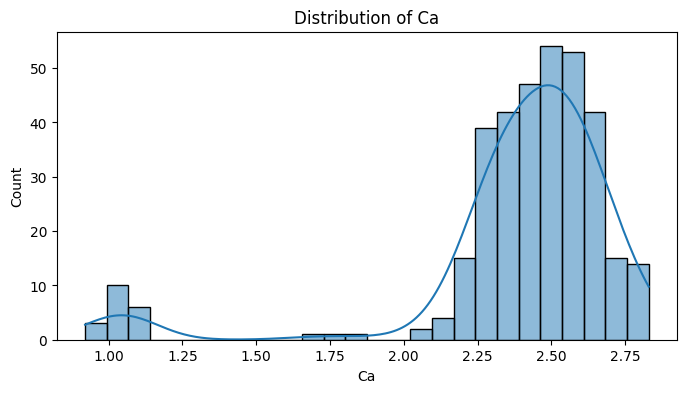

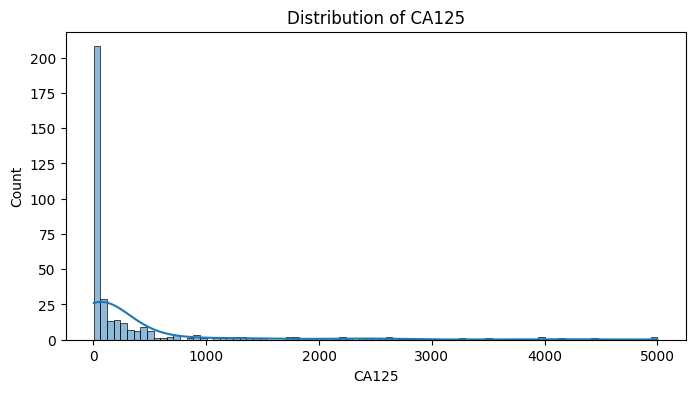

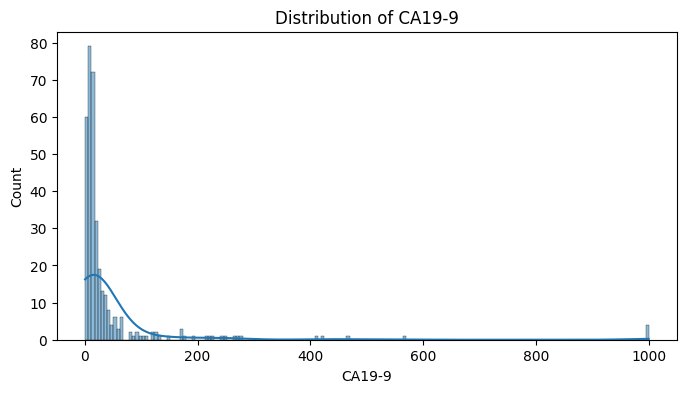

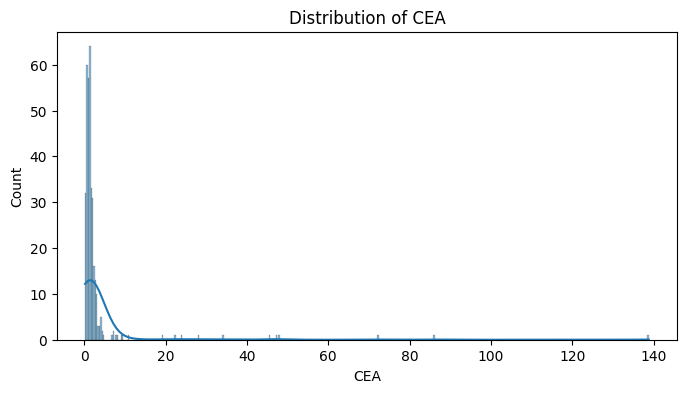

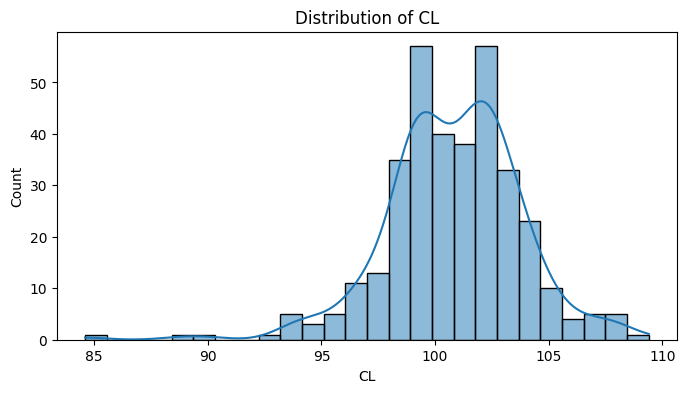

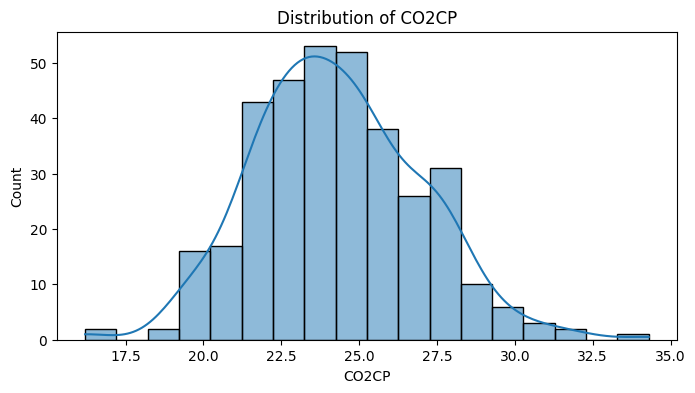

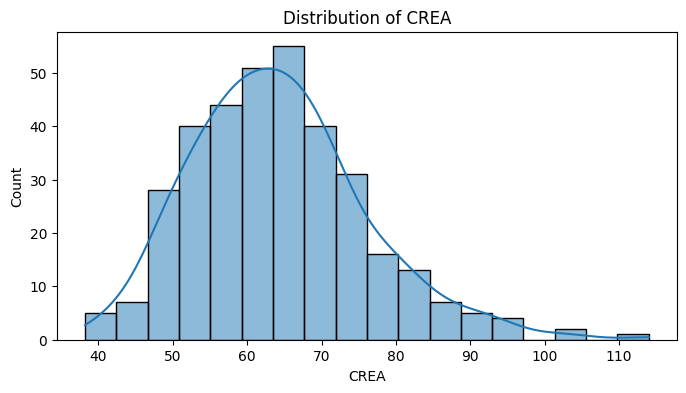

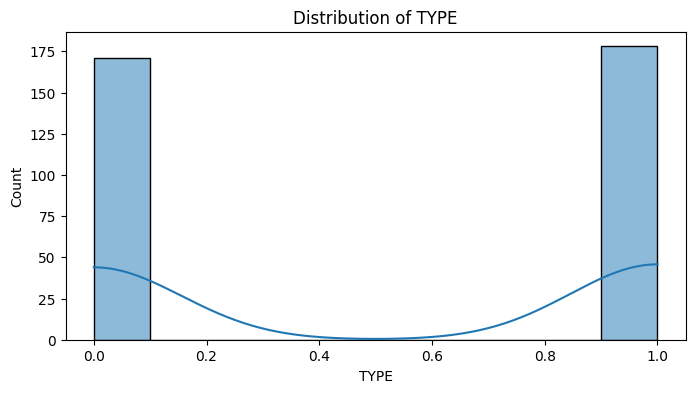

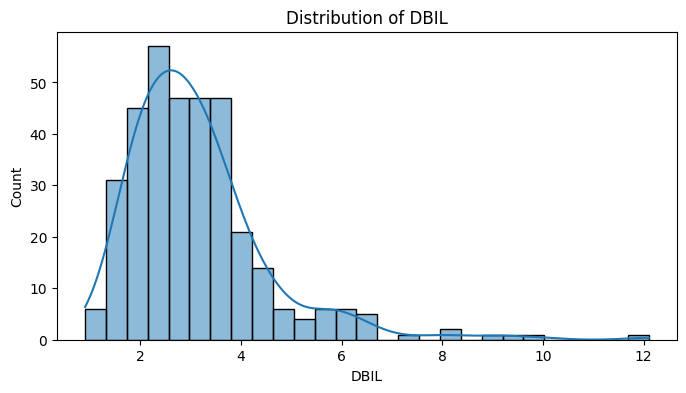

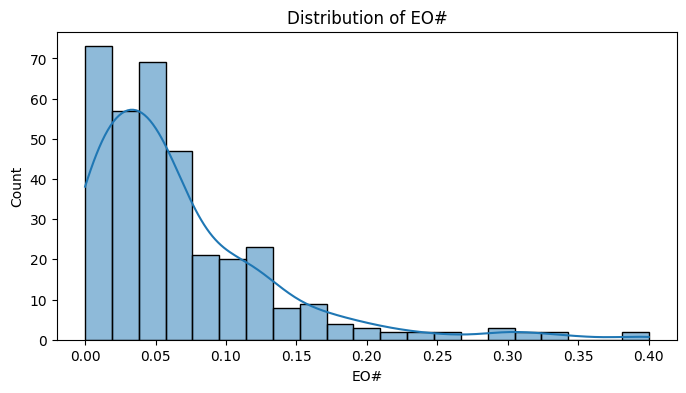

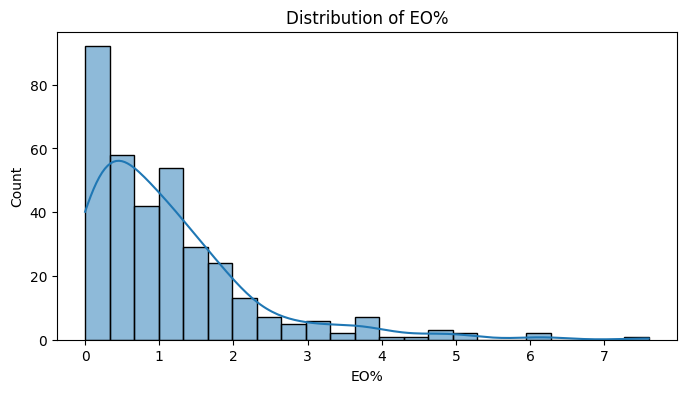

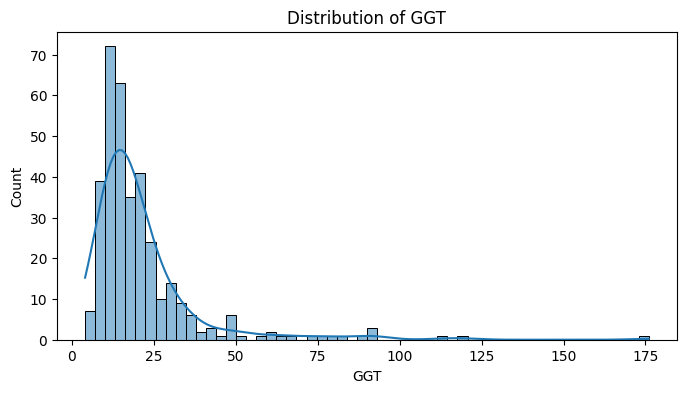

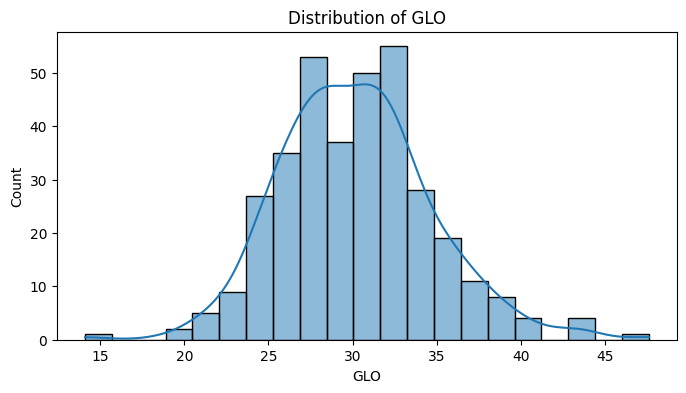

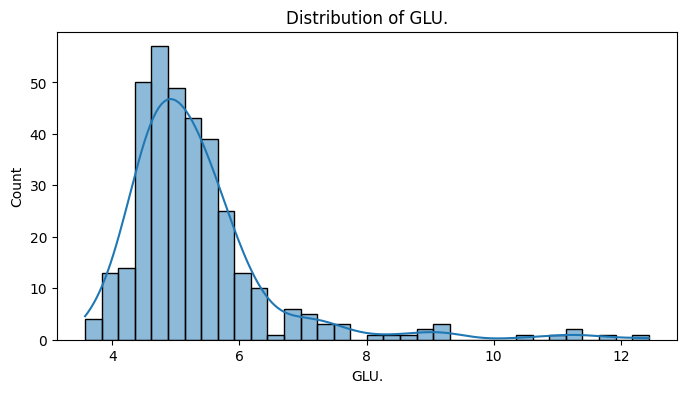

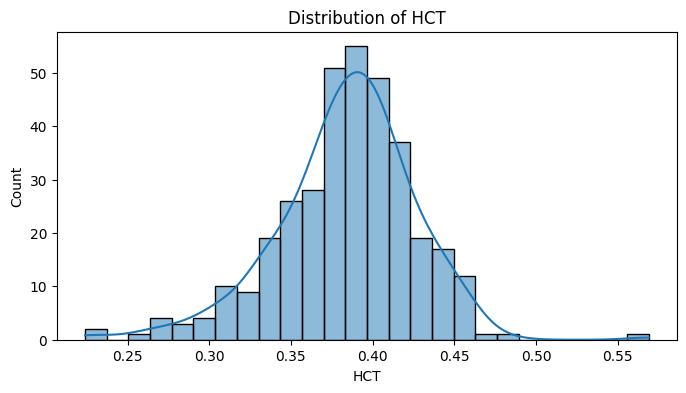

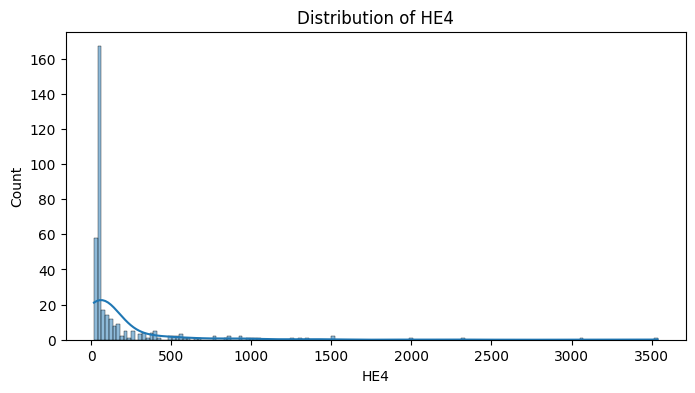

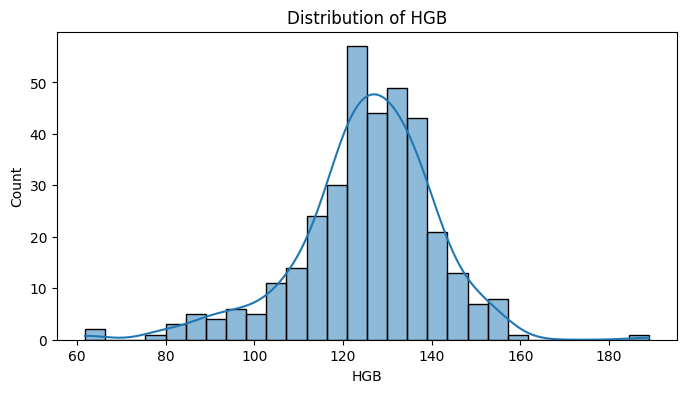

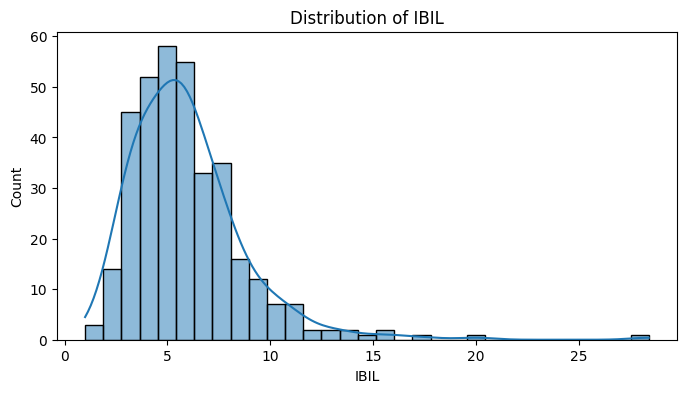

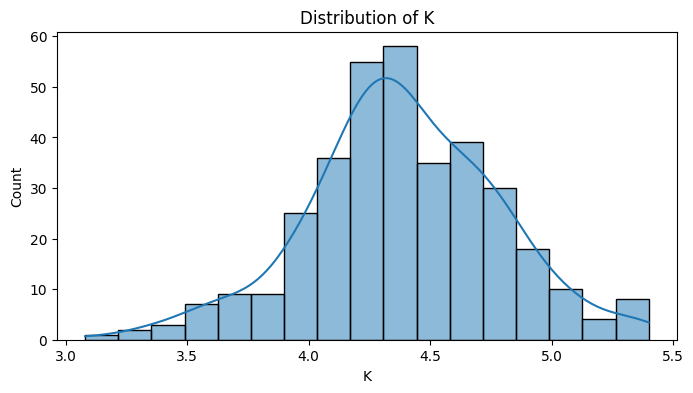

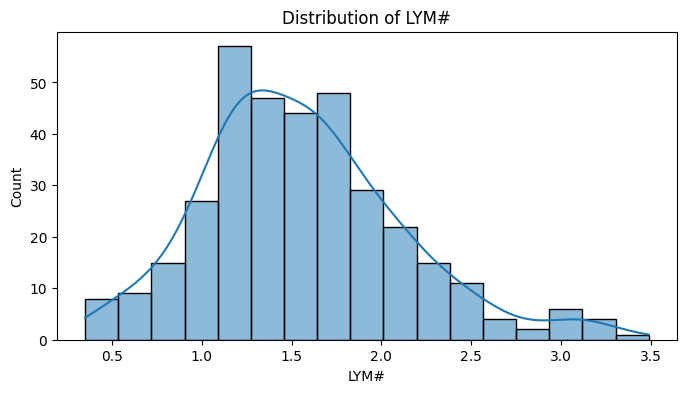

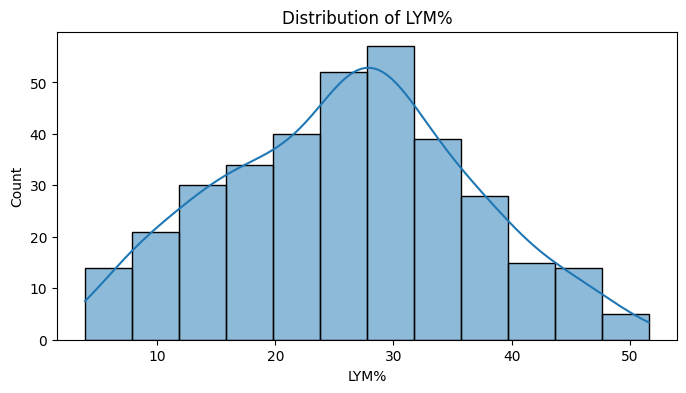

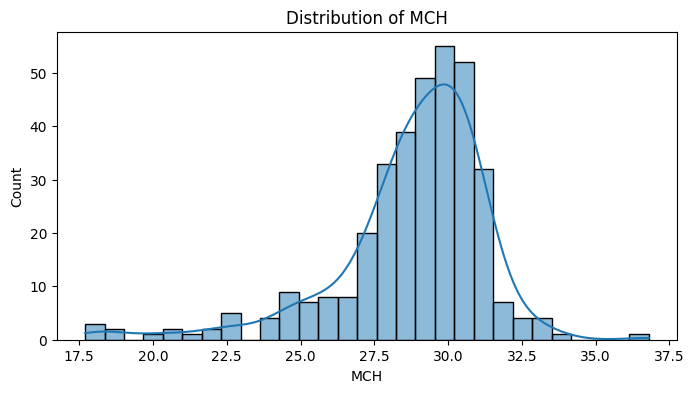

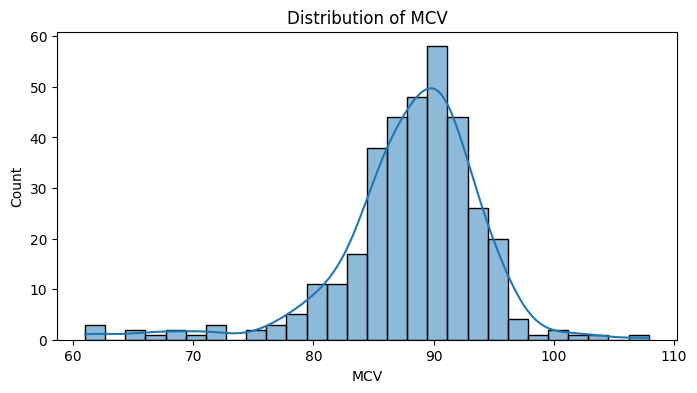

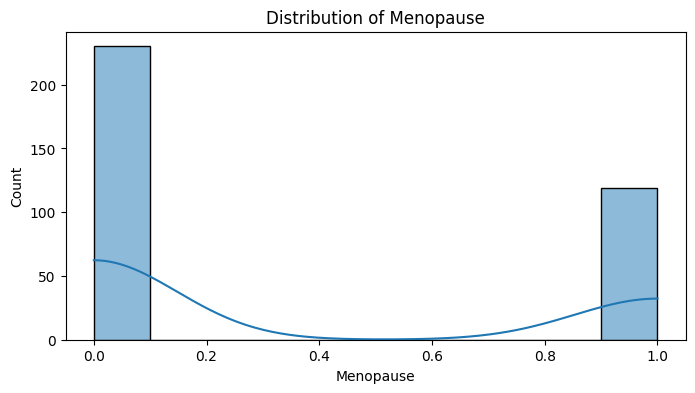

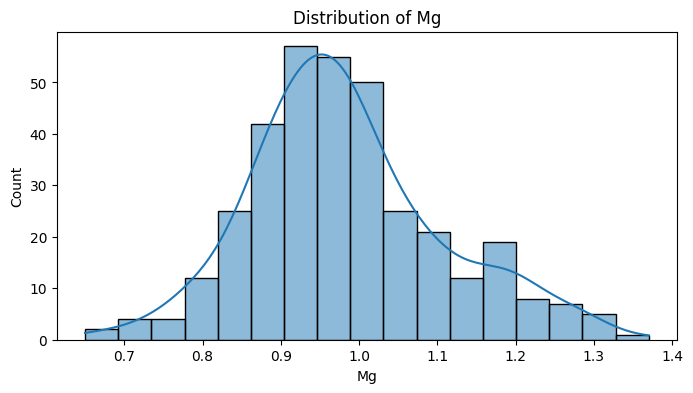

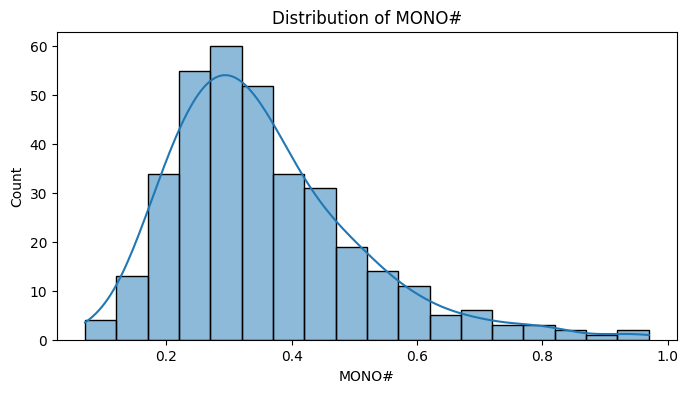

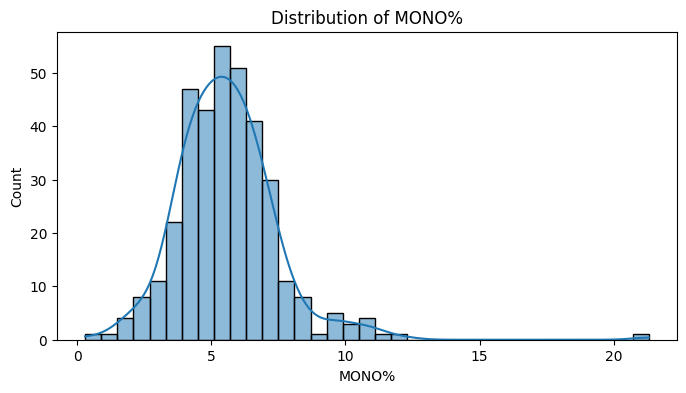

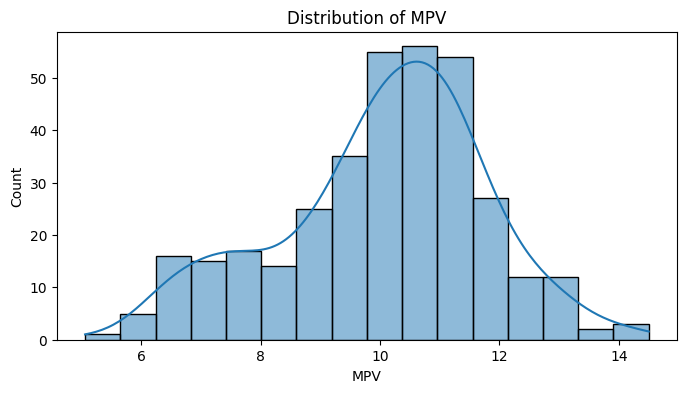

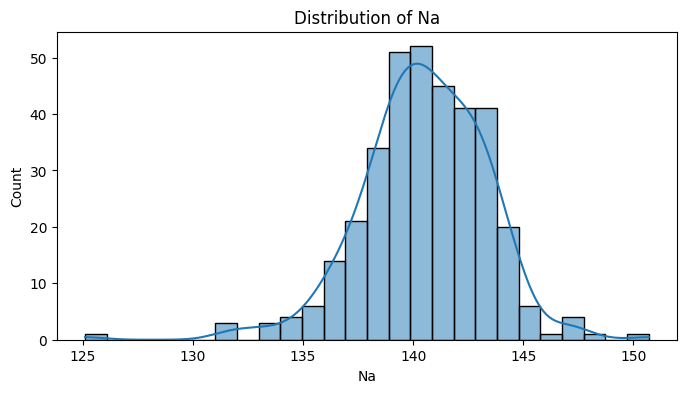

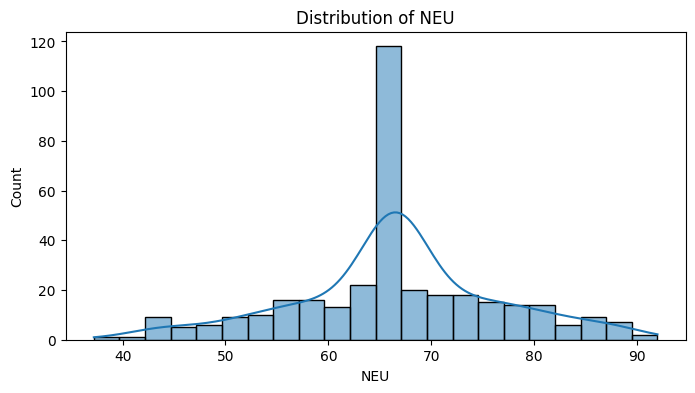

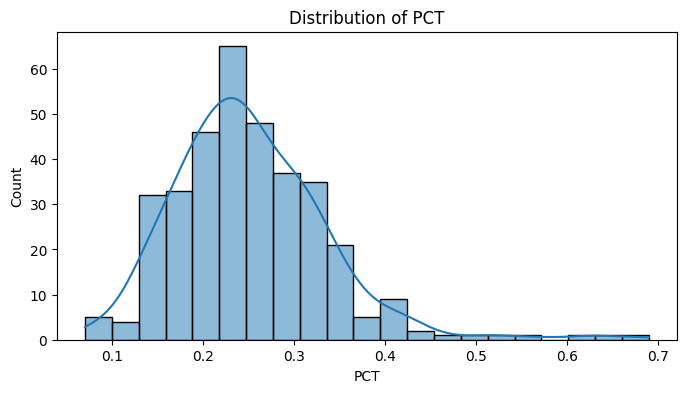

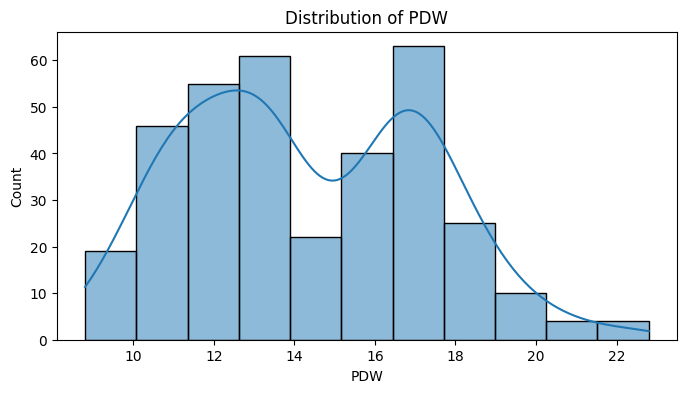

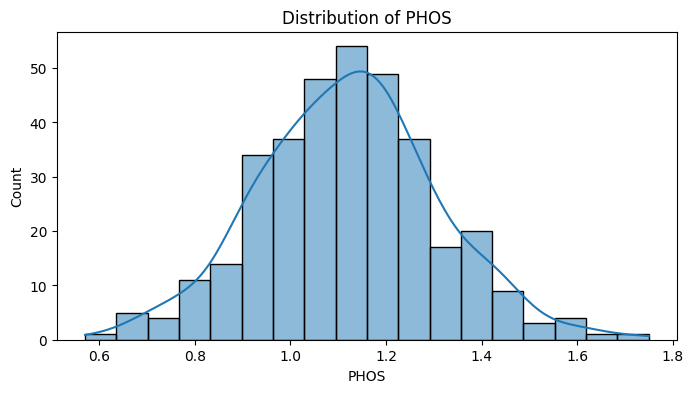

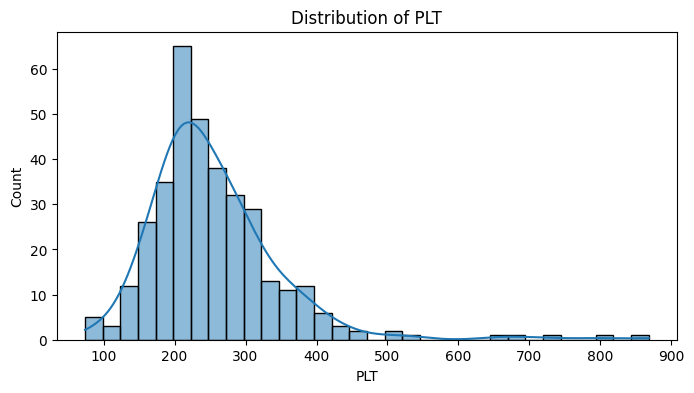

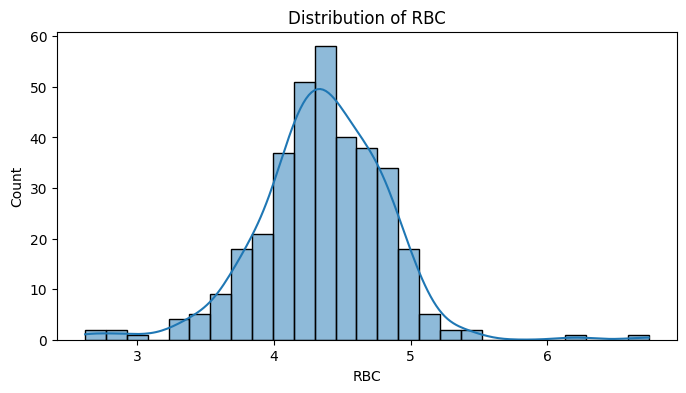

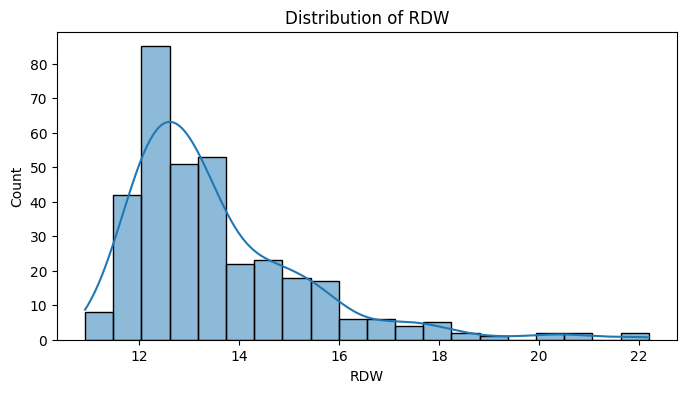

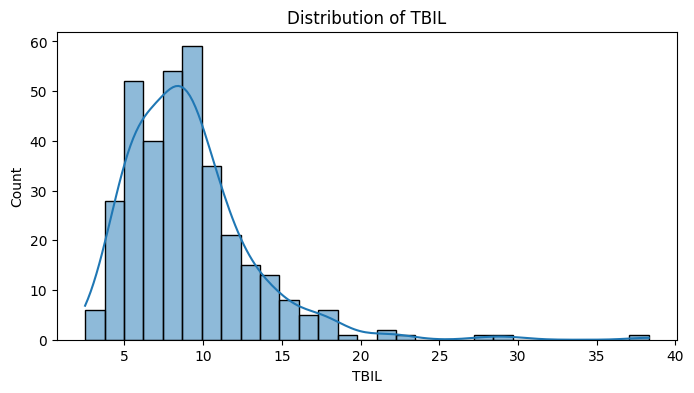

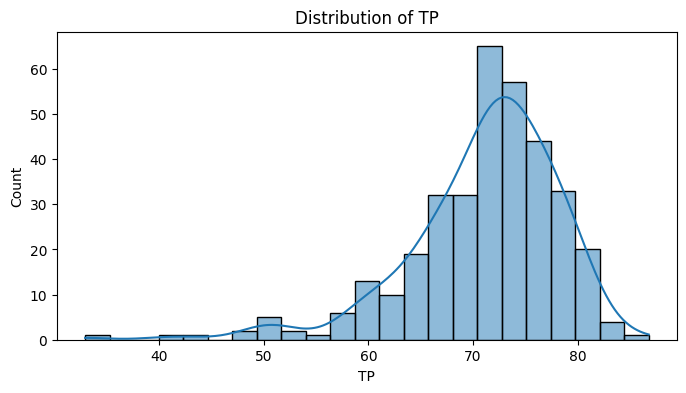

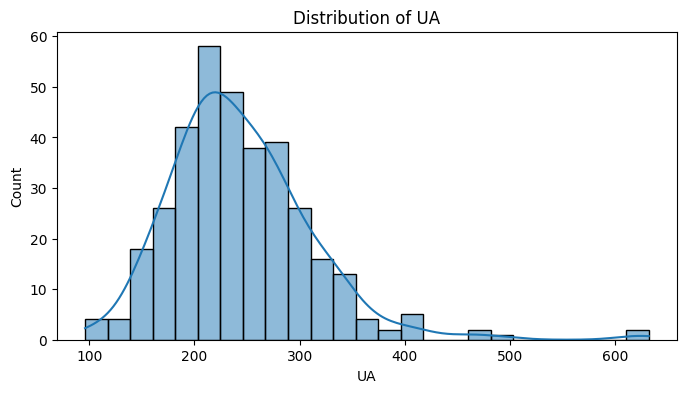

In [ ]:
numerical_cols = df.columns.tolist()

# Generate distribution plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

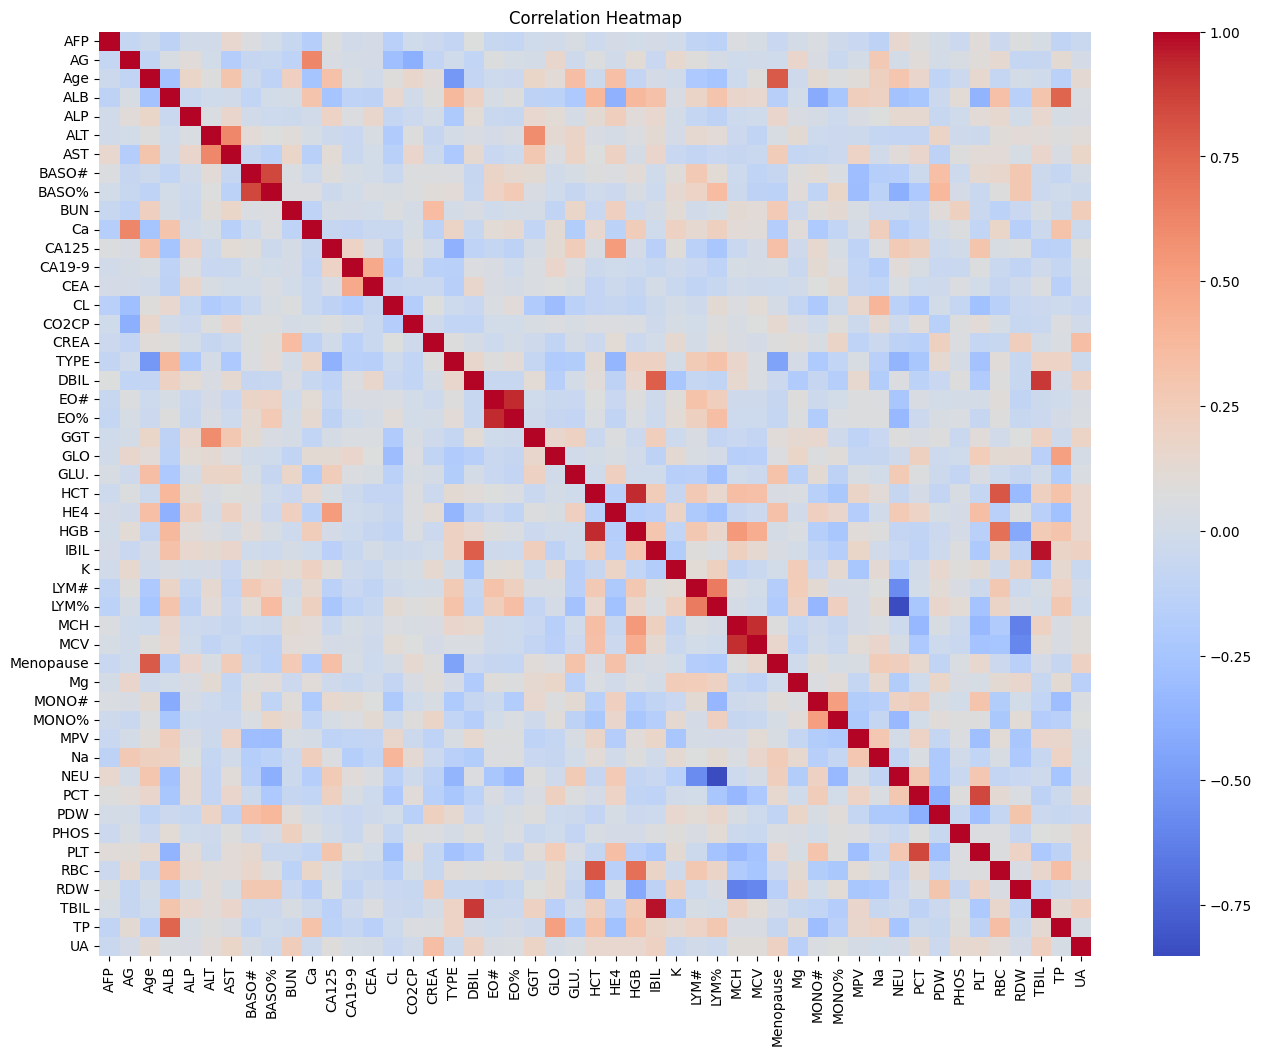

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Calculate correlations with the target variable 'TYPE'
correlations_with_type = df.corr()['TYPE'].sort_values(ascending=False)
# Get the absolute values of correlations and sort
absolute_correlations_with_type = correlations_with_type.abs().sort_values(ascending=False)

# Excluding the target variable 'TYPE'
top_10_correlated_features = absolute_correlations_with_type.drop('TYPE').head(10)

# Display of the top 10 features and their correlation with 'TYPE'
print("Top 10 Features by Absolute Correlation with TYPE:")
display(correlations_with_type[top_10_correlated_features.index])

Top 10 Features by Absolute Correlation with TYPE:


,TYPE
Age,-0.514098
Menopause,-0.455770
ALB,0.375415
CA125,-0.372262
NEU,-0.357346
HE4,-0.350991
LYM%,0.315035
PLT,-0.270182
LYM#,0.256494
PCT,-0.243719


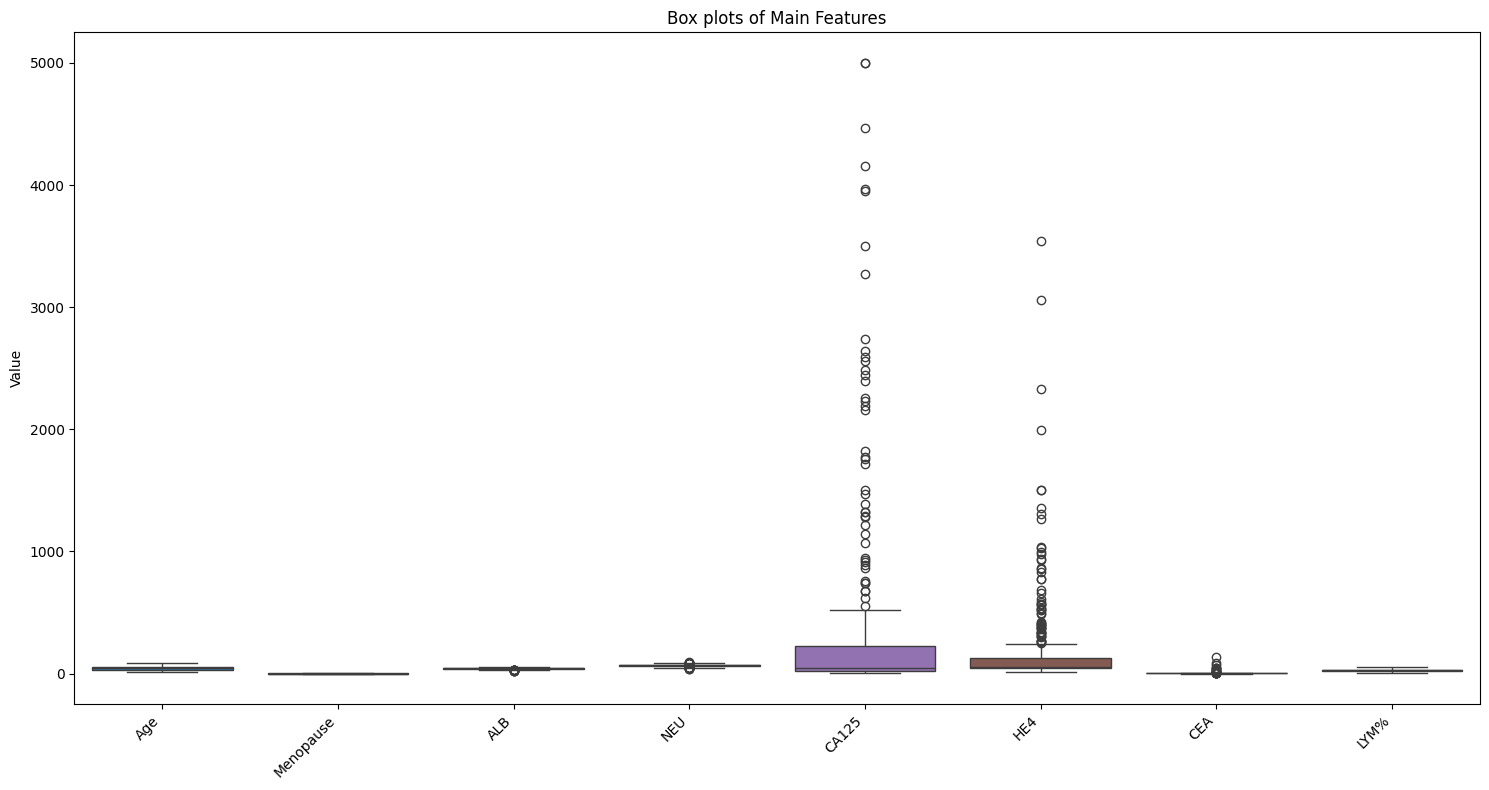

In [ ]:
# Box plots to visualise the distribution and outliers for key features
features_for_boxplot = ['Age', 'Menopause', 'ALB', 'NEU', 'CA125', 'HE4', 'CEA', 'LYM%']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features_for_boxplot])
plt.title('Box plots of Main Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


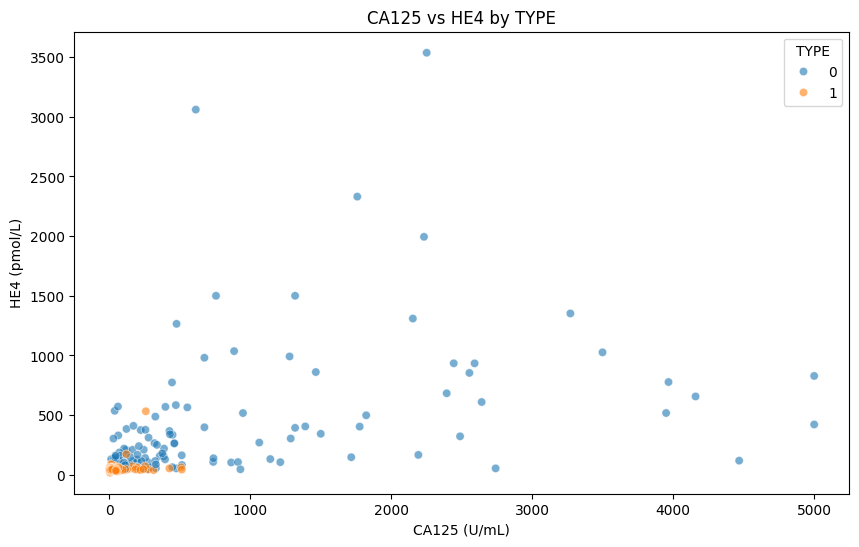

In [ ]:
# Scatter plot of 'CA125' vs 'HE4' colored by 'Outcome'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CA125', y='HE4', hue='TYPE', data=df, alpha=0.6)
plt.title('CA125 vs HE4 by TYPE')
plt.xlabel('CA125 (U/mL)')
plt.ylabel('HE4 (pmol/L)')
plt.show()

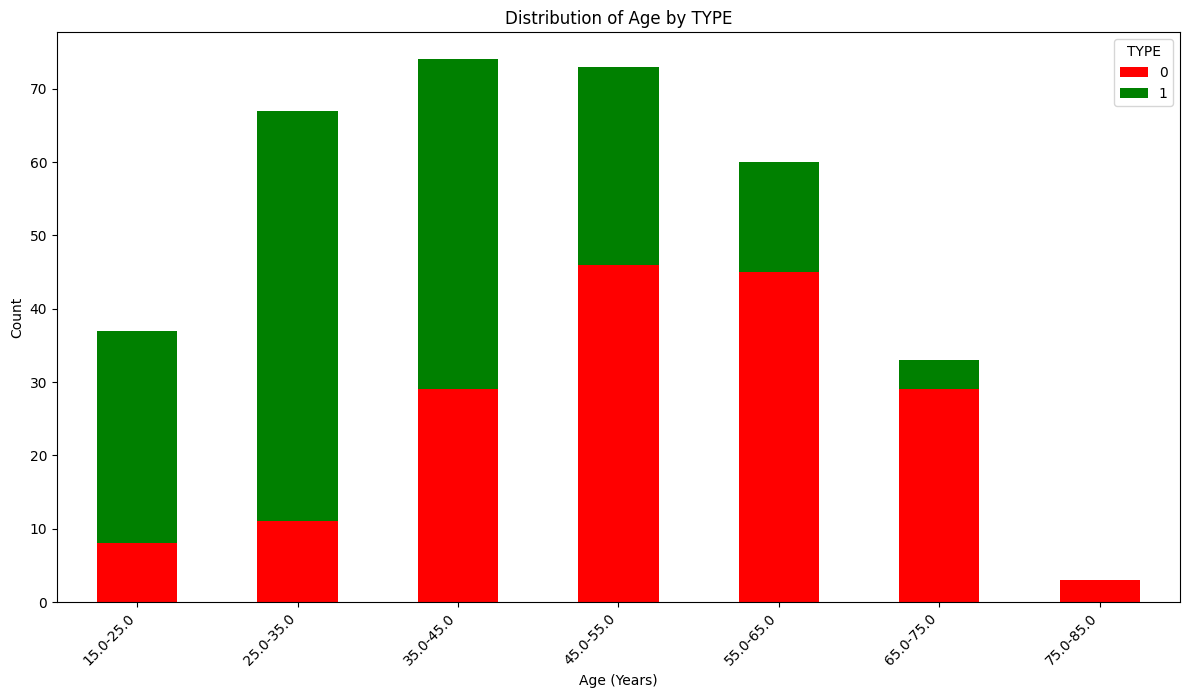

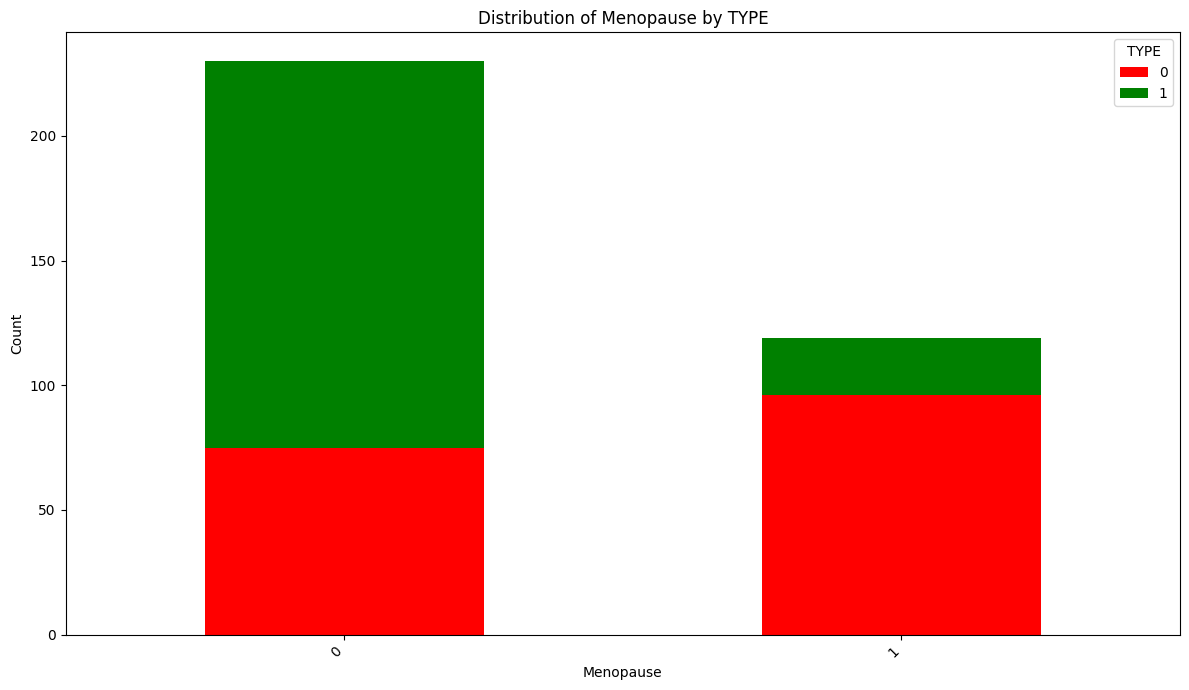

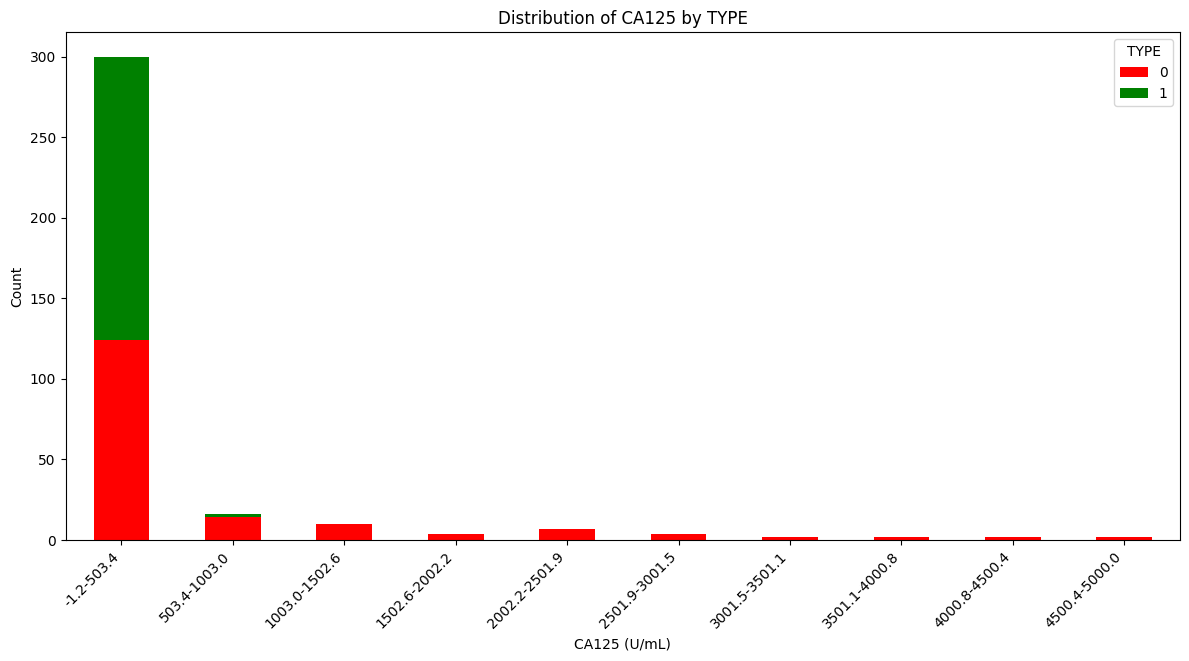

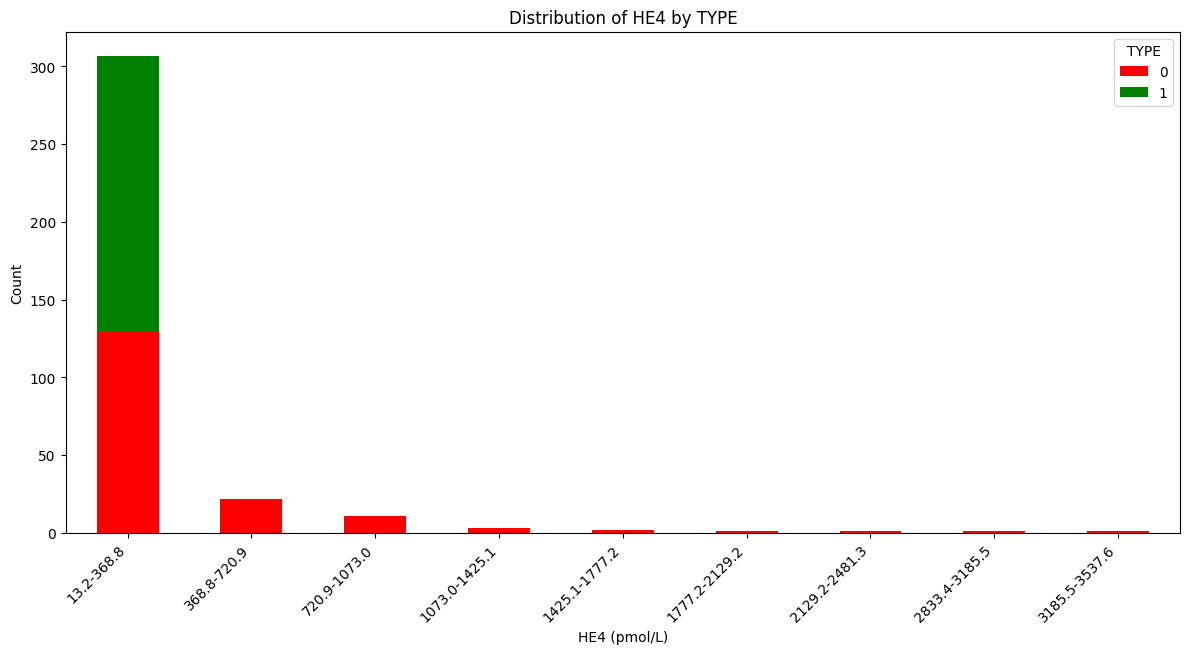

In [ ]:
# Select some key risk factors
risk_factors_to_plot = ['Age', 'Menopause', 'CA125', 'HE4']

# Binning in steps of 10 years for Age, and 10 bins for other numerical features
binning_strategies = {
    'Age': {'bins': range(df['Age'].min(), df['Age'].max() + 11, 10)},
    'CA125': {'bins': 10},
    'HE4': {'bins': 10}
    }

# Define units for the numerical features
units = {
    'Age': 'Years',
    'CA125': 'U/mL',
    'HE4': 'pmol/L'
}

# Stacked bar charts for selected risk factors
for feature in risk_factors_to_plot:
    if feature in binning_strategies:
        # Binning applied to the feature
        binned_feature = pd.cut(df[feature], **binning_strategies[feature])
        crosstab = pd.crosstab(binned_feature, df['TYPE'])
    else:
        crosstab = pd.crosstab(df[feature], df['TYPE'])

    # Plot the stacked bar charts
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), color=['red', 'green'])
    plt.title(f'Distribution of {feature} by TYPE')

    xlabel_with_unit = feature
    if feature in units:
        xlabel_with_unit = f'{feature} ({units[feature]})'
    plt.xlabel(xlabel_with_unit)

    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='TYPE', loc='upper right')
    plt.tight_layout()


    if feature in ['Age', 'CA125', 'HE4']:
        x_labels = [f'{interval.left:.1f}-{interval.right:.1f}' for interval in crosstab.index]
        ax.set_xticklabels(x_labels)

    plt.show()

#**Machine Learning Models**

In [ ]:
# Separate Features (X) and Target (y which is "TYPE")
target_column = 'TYPE'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [ ]:
# Check the distribution of the target variable 'TYPE'
class_distribution = df['TYPE'].value_counts()
print("Distribution of the target variable 'TYPE':")
print(class_distribution)

Distribution of the target variable 'TYPE':
TYPE
1    178
0    171
Name: count, dtype: int64


**Dimensionality Reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA
# Use X (features after preprocessing)
pca = PCA(n_components=0.95, random_state=42) # Added random_state for reproducibility

# Fit PCA on the data and transform it
X_pca = pca.fit_transform(X)

print(f"Original number of features after initial selection: {X.shape[1]}")
print(f"Number of components after PCA (retaining 95% variance): {pca.n_components_}")
print(f"Shape of data after PCA: {X_pca.shape}")


Original number of features after initial selection: 48
Number of components after PCA (retaining 95% variance): 2
Shape of data after PCA: (349, 2)


**Feature Selection Using Correlation**

In [ ]:
# Calculate the absolute correlation matrix for the processed data
correlation_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the set out threshold (in this case, I chose 0.9)
correlation_threshold = 0.9
to_drop_correlated = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

print(f"\nFeatures to drop due to high correlation (>{correlation_threshold}): {to_drop_correlated}")

if to_drop_correlated:
    X_selected = X.drop(columns=to_drop_correlated)
    print(f"Shape of data after correlation-based feature selection: {X_selected.shape}")
else:
    X_selected = X
    print("\nNo features dropped due to high correlation.")


Features to drop due to high correlation (>0.9): ['EO%', 'HGB', 'MCV', 'TBIL']
Shape of data after correlation-based feature selection: (349, 44)


**Split the data into training and testing sets (80% train, 20% test)**

In [ ]:
from sklearn.model_selection import train_test_split

# Use the features selected after PCA and correlation analysis
X_final = X_selected

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Test features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Test target (y_test) shape: {y_test.shape}")

Training features (X_train) shape: (279, 44)
Test features (X_test) shape: (70, 44)
Training target (y_train) shape: (279,)
Test target (y_test) shape: (70,)


**Logistic Regression Classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialise the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.9286

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.90      0.97      0.93        36

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70


Confusion Matrix:


array([[30,  4],
       [ 1, 35]])

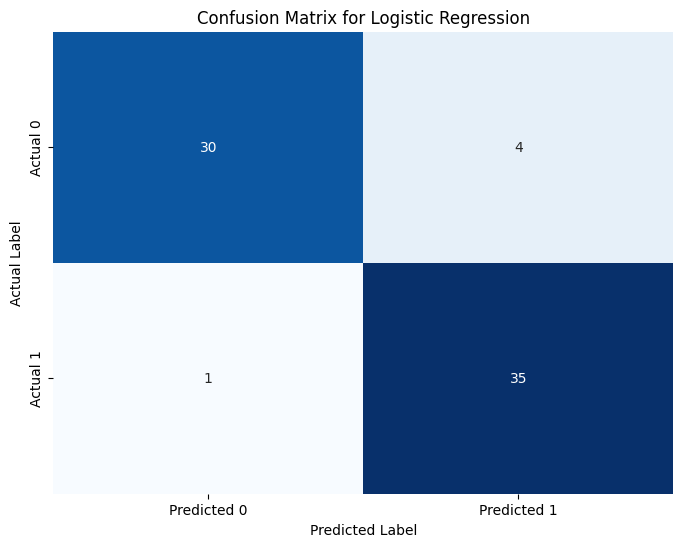

In [ ]:
# Plot the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Random Forest Classification**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Hyperparameter tunning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best estimator from the grid search and make predictions on the test data
best_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
classification_rep_tuned_rf = classification_report(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)

print(f"Random Forest Accuracy: {accuracy_tuned_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_rep_tuned_rf)
print("\nRandom Forest Confusion Matrix:")
display(conf_matrix_tuned_rf)

Random Forest Accuracy: 0.9286

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.92      0.94      0.93        36

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70


Random Forest Confusion Matrix:


array([[31,  3],
       [ 2, 34]])

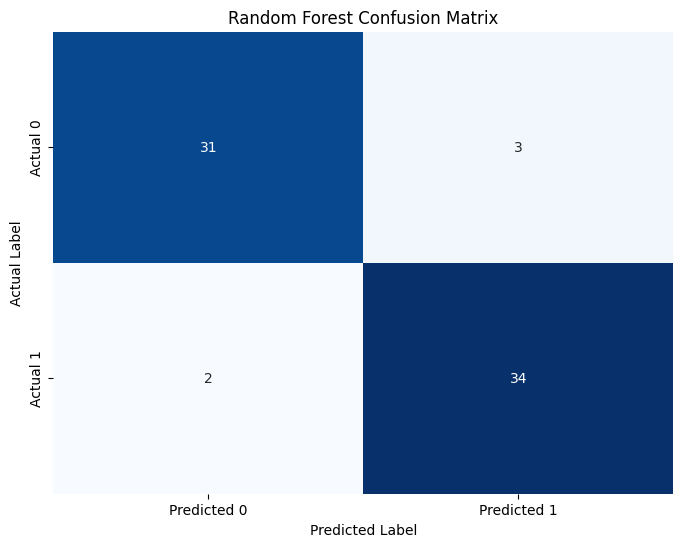

In [ ]:
# Confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

**Gradient Boosting Xgboost and Lightgbm**

In [ ]:
%pip install xgboost lightgbm

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid=param_grid_xgb,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)

# Best estimator from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data using the best XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("\nXGBoost Classification Report:")
print(classification_rep_xgb)
print("\nXGBoost Confusion Matrix:")
display(conf_matrix_xgb)

XGBoost Accuracy: 0.9571

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.97      0.96        36

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70


XGBoost Confusion Matrix:


array([[32,  2],
       [ 1, 35]])

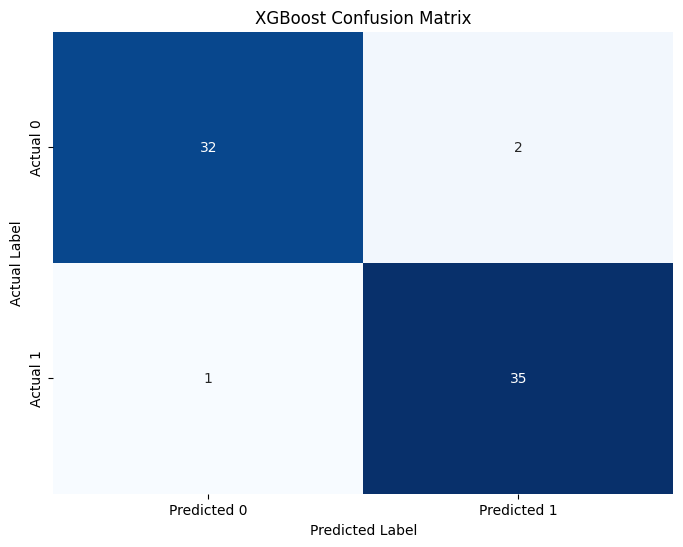

In [ ]:
# Plot the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

**Ligthgbm**:




In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning
param_grid_lgbm = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 64, 128, 256],
    'min_child_samples': [10, 20, 30, 40]
}
grid_search_lgbm = GridSearchCV(estimator=LGBMClassifier(random_state=42),
                           param_grid=param_grid_lgbm,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV to the training data
grid_search_lgbm.fit(X_train, y_train)

print("Best parameters found for LightGBM: ", grid_search_lgbm.best_params_)

# Best estimator from the grid search
best_lgbm_model = grid_search_lgbm.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
[LightGBM] [Info] Number of positive: 142, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2713
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508961 -> initscore=0.035846
[LightGBM] [Info] Start training from score 0.035846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
# Predictions on the test data using the best LightGBM model
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")
print("\nLightGBM Classification Report:")
print(classification_rep_lgbm)
print("\nLightGBM Confusion Matrix:")
display(conf_matrix_lgbm)

LightGBM Accuracy: 0.9429

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.92      0.97      0.95        36

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70


LightGBM Confusion Matrix:


array([[31,  3],
       [ 1, 35]])

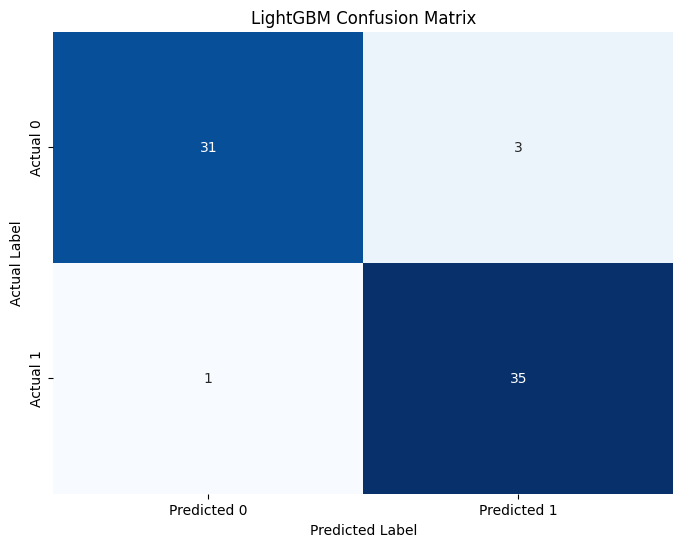

In [ ]:
# Plot the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LightGBM Confusion Matrix')
plt.show()

**Support Vector Machine (SVM) Classification**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialise the SVM classifier, using a linear kernel
svm_model = SVC(kernel='linear', random_state=42)


In [ ]:
# Set Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
# GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42, probability=True),
                               param_grid=param_grid_svm,
                               cv=5,  # 5-fold cross-validation
                               scoring='roc_auc',
                               n_jobs=-1,
                               verbose=1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

print("\nBest parameters for SVM: ", grid_search_svm.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Get the best estimator from the grid search for SVM
best_svm_model = grid_search_svm.best_estimator_

# Make predictions on the test data using the best SVM model
y_pred_tuned_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_tuned_svm = accuracy_score(y_test, y_pred_tuned_svm)
classification_rep_tuned_svm = classification_report(y_test, y_pred_tuned_svm)
conf_matrix_tuned_svm = confusion_matrix(y_test, y_pred_tuned_svm)

print(f"SVM Accuracy: {accuracy_tuned_svm:.4f}")
print("\nSVM Classification Report:")
print(classification_rep_tuned_svm)
print("\nSVM Confusion Matrix:")
display(conf_matrix_tuned_svm)

SVM Accuracy: 0.8714

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.83      0.94      0.88        36

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.88      0.87      0.87        70


SVM Confusion Matrix:


array([[27,  7],
       [ 2, 34]])

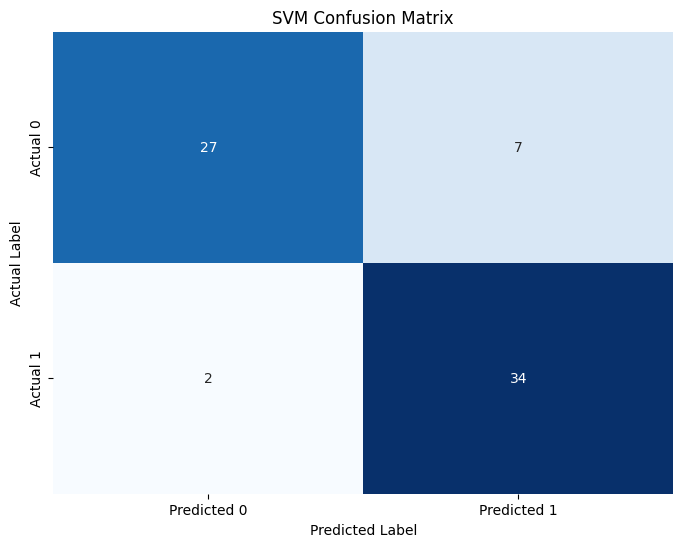

In [ ]:
# Plot the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVM Confusion Matrix')
plt.show()

**Neural Network Classifier**




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network architecture using Keras Sequential
model_nn = Sequential()

# Add the input layer and a hidden layer
model_nn.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add an additional hidden layer
model_nn.add(Dense(units=32, activation='relu'))

# Add a Dropout layer
model_nn.add(Dropout(0.5))

# Add the output layer
model_nn.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

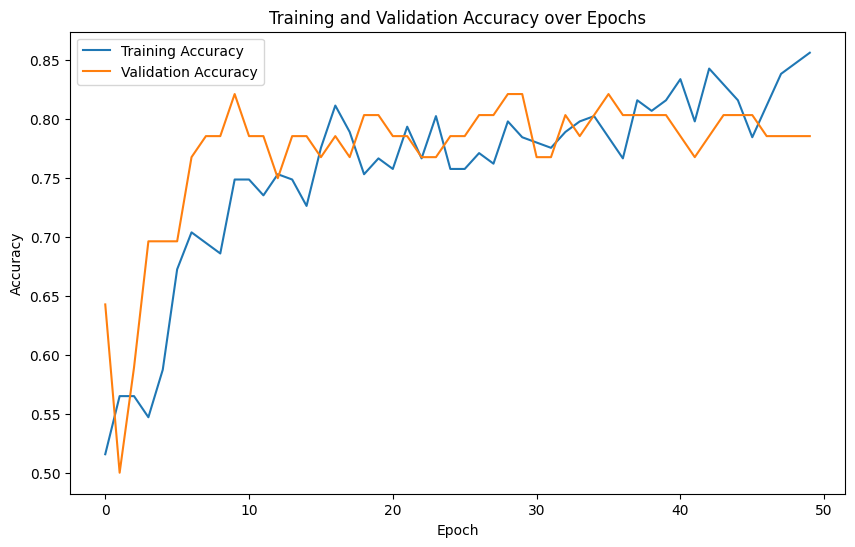

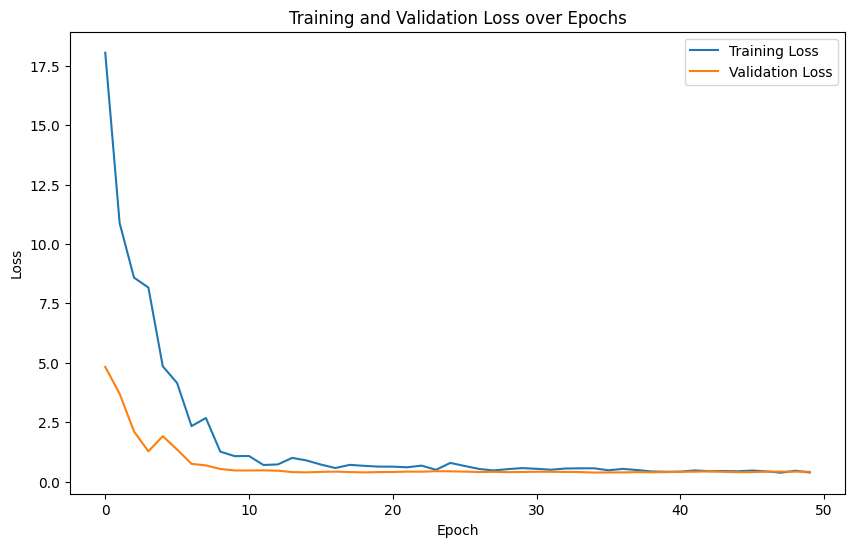

In [ ]:
# Train the neural network model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the neural network model on the test data
loss_nn, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test data
y_pred_nn_proba = model_nn.predict(X_test)
y_pred_nn = (y_pred_nn_proba > 0.5).astype("int32")

# Generate classification report and confusion matrix
classification_rep_nn = classification_report(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn:.4f}")
print("\nNeural Network Classification Report:")
print(classification_rep_nn)
print("\nNeural Network Confusion Matrix:")
display(conf_matrix_nn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Neural Network Accuracy: 0.8714

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.86      0.89      0.88        36

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70


Neural Network Confusion Matrix:


array([[29,  5],
       [ 4, 32]])

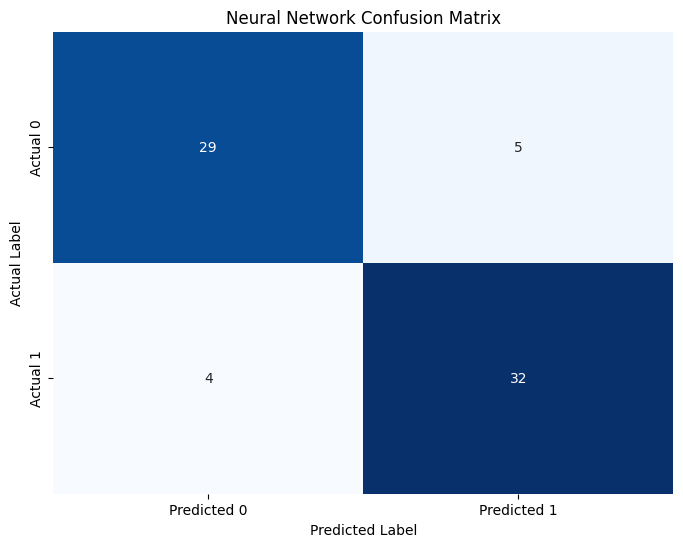

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Neural Network Confusion Matrix')
plt.show()

**Model Comparison**:




In [ ]:
# Function to extract metrics from classification report
def extract_metrics(report_string):
    lines = report_string.split('\n')
    metrics = {}

    for line in lines[2:-3]: # to find average
        parts = line.split()

        if len(parts) >= 4:
            label = parts[0]
            # Handle cases where label is a number
            if label.isdigit():
                label = f"Class {label}"
            metrics[f'{label} Precision'] = float(parts[1])
            metrics[f'{label} Recall'] = float(parts[2])
            metrics[f'{label} F1-score'] = float(parts[3])
    return metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import CalibrationDisplay # Add this import for CalibrationDisplay

# Get classification report strings and AUC-ROC scores
classification_rep_lr_str = classification_report(y_test, model.predict(X_test))

y_pred_proba_lr = model.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)

classification_rep_tuned_rf_str = classification_report(y_test, y_pred_tuned_rf)
y_pred_proba_tuned_rf = best_rf_model.predict_proba(X_test)[:, 1]
auc_roc_tuned_rf = roc_auc_score(y_test, y_pred_proba_tuned_rf)

classification_rep_xgb_str = classification_report(y_test, y_pred_xgb)
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

classification_rep_lgbm_str = classification_report(y_test, y_pred_lgbm)
y_pred_proba_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]
auc_roc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

y_score_tuned_svm = best_svm_model.decision_function(X_test) # for SVM will provide similar score to probability
auc_roc_tuned_svm = roc_auc_score(y_test, y_score_tuned_svm)
classification_rep_tuned_svm_str = classification_report(y_test, y_pred_tuned_svm)


# For Neural Network, will use the probabilities found previously
auc_roc_nn = roc_auc_score(y_test, y_pred_nn_proba)
classification_rep_nn_str = classification_report(y_test, y_pred_nn)


# Dictionary to store performance metrics for each model
performance_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc_lr,
        **extract_metrics(classification_rep_lr_str)
    },
    'Random Forest': {
        'Accuracy': accuracy_tuned_rf,
        'AUC-ROC': auc_roc_tuned_rf,
        **extract_metrics(classification_rep_tuned_rf_str)
    },
    'XGBoost': {
        'Accuracy': accuracy_xgb,
        'AUC-ROC': auc_roc_xgb,
         **extract_metrics(classification_rep_xgb_str)
    },
    'LightGBM': {
        'Accuracy': accuracy_lgbm,
        'AUC-ROC': auc_roc_lgbm,
         **extract_metrics(classification_rep_lgbm_str)
    },
    'SVM': {
        'Accuracy': accuracy_tuned_svm,
        'AUC-ROC': auc_roc_tuned_svm,
         **extract_metrics(classification_rep_tuned_svm_str)
    },
     'Neural Network': {
        'Accuracy': accuracy_nn,
        'AUC-ROC': auc_roc_nn,
        **extract_metrics(classification_rep_nn_str)
    }
}

# Dictionary is converted to a pandas DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Format the DataFrame to 4 decimal places
performance_df = performance_df.round(4)

print("Model Performance Comparison:")
display(performance_df)

Model Performance Comparison:


,Accuracy,AUC-ROC,Class 0 Precision,Class 0 Recall,Class 0 F1-score,Class 1 Precision,Class 1 Recall,Class 1 F1-score
Logistic Regression,0.9286,0.9649,0.97,0.88,0.92,0.90,0.97,0.93
Random Forest,0.9286,0.9755,0.94,0.91,0.93,0.92,0.94,0.93
XGBoost,0.9571,0.9763,0.97,0.94,0.96,0.95,0.97,0.96
LightGBM,0.9429,0.9747,0.97,0.91,0.94,0.92,0.97,0.95
SVM,0.8714,0.9444,0.93,0.79,0.86,0.83,0.94,0.88
Neural Network,0.8714,0.9101,0.88,0.85,0.87,0.86,0.89,0.88


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


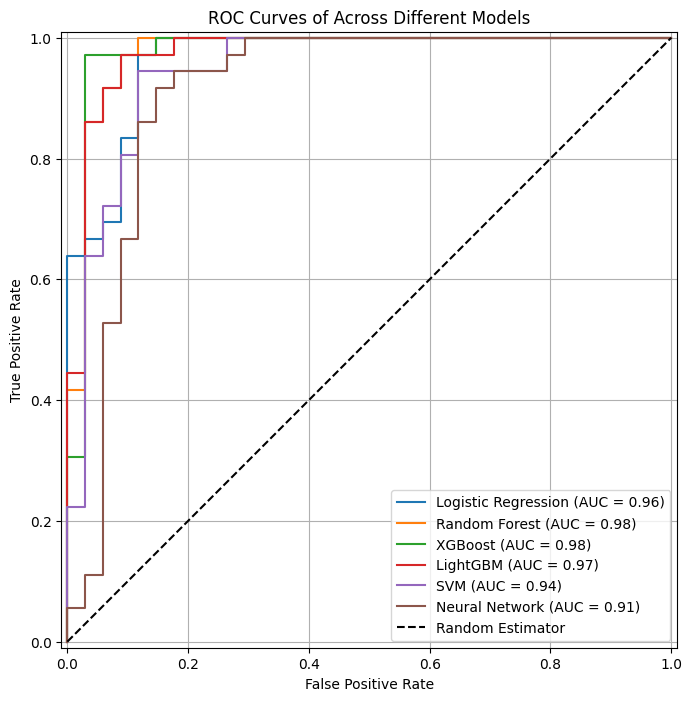

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# List of models and their predicted probabilities/decision functions
models = [
    ('Logistic Regression', model, model.predict_proba(X_test)[:, 1]),
    ('Random Forest', best_rf_model, best_rf_model.predict_proba(X_test)[:, 1]),
    ('XGBoost', best_xgb_model, best_xgb_model.predict_proba(X_test)[:, 1]),
    ('LightGBM', best_lgbm_model, best_lgbm_model.predict_proba(X_test)[:, 1]),
    ('SVM', best_svm_model, best_svm_model.decision_function(X_test)), # Use decision_function for SVM
    ('Neural Network', model_nn, model_nn.predict(X_test).ravel()) # Use predict for NN
]

# Plot of ROC curves for each model
plt.figure(figsize=(10, 8))
ax = plt.gca()

for name, clf, y_proba_or_score in models:
    if name == 'SVM':
        # For SVM, will use decision_function and plot the curve
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=name)
    elif name == 'Neural Network':
        # For Neural Network, will use the predicted probabilities
         RocCurveDisplay.from_predictions(y_test, y_proba_or_score, ax=ax, name=name)
    else:
        # For models with predict_proba, will use from_estimator
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=name)


plt.title('ROC Curves of Across Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', label='Random Estimator') # Random estimator line
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**SHAP Analysis of all models**

In [ ]:
%pip install shap
import shap
%pip install --upgrade shap

In [ ]:
# Initialise SHAP explainers for each model
explainer_lr = shap.Explainer(model, X_train)
explainer_rf = shap.Explainer(best_rf_model, X_train)
explainer_xgb = shap.Explainer(best_xgb_model, X_train)
explainer_lgbm = shap.Explainer(best_lgbm_model, X_train)
explainer_svm = shap.KernelExplainer(best_svm_model.decision_function, X_train) # Use KernelExplainer for SVM

# Use a compatible masker for the NN
masker_nn = shap.maskers.Independent(X_train)
explainer_nn = shap.Explainer(model_nn, masker_nn)


# SHAP values for the test set
shap_values_lr = explainer_lr(X_test)
shap_values_rf = explainer_rf(X_test, check_additivity=False)
shap_values_xgb = explainer_xgb(X_test, check_additivity=False)
shap_values_lgbm = explainer_lgbm(X_test, check_additivity=False)
shap_values_svm = explainer_svm(X_test)
shap_values_nn = explainer_nn(X_test)

  0%|          | 0/70 [00:00<?, ?it/s]

PermutationExplainer explainer: 71it [00:12,  1.54it/s]


/tmp/ipython-input-3185072122.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lr, X_test, show=False)


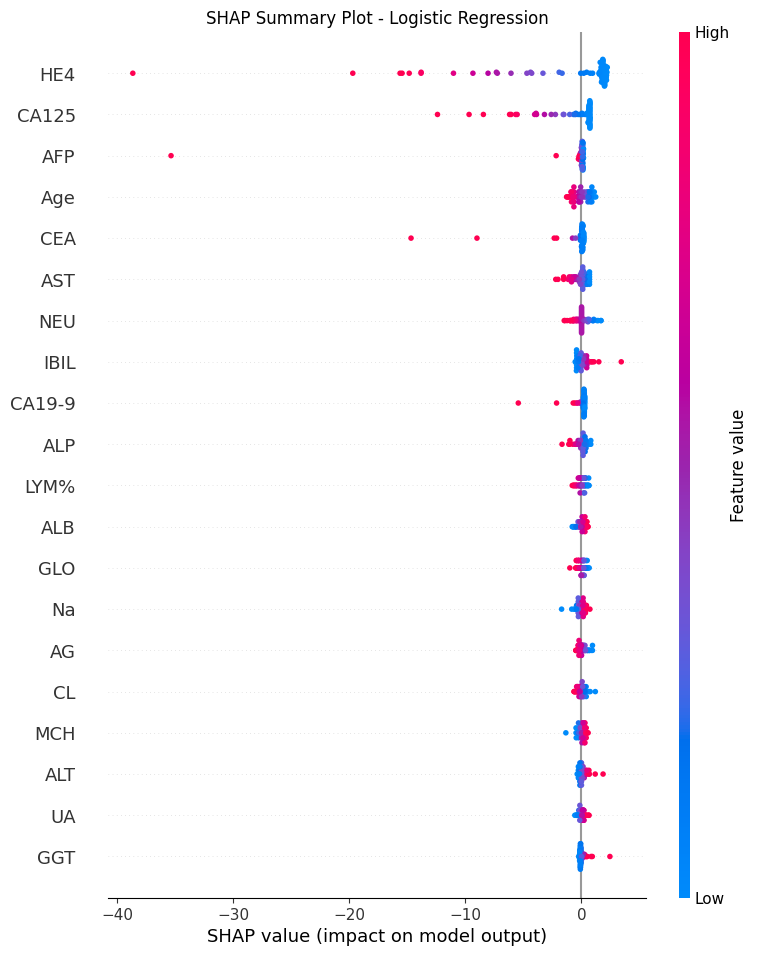

/tmp/ipython-input-3185072122.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, X_test, show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


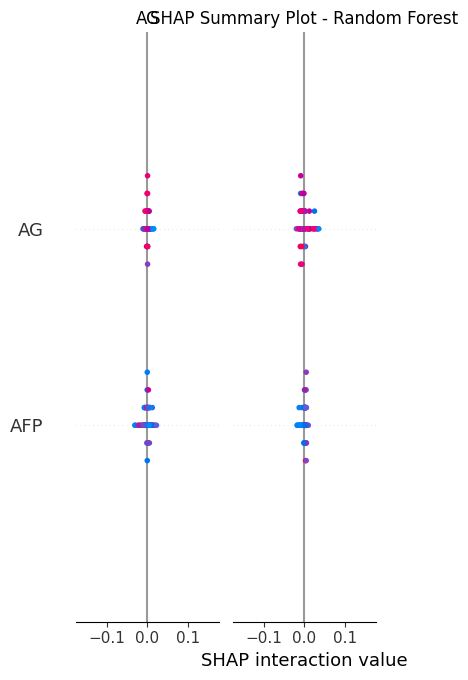

/tmp/ipython-input-3185072122.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test, show=False)


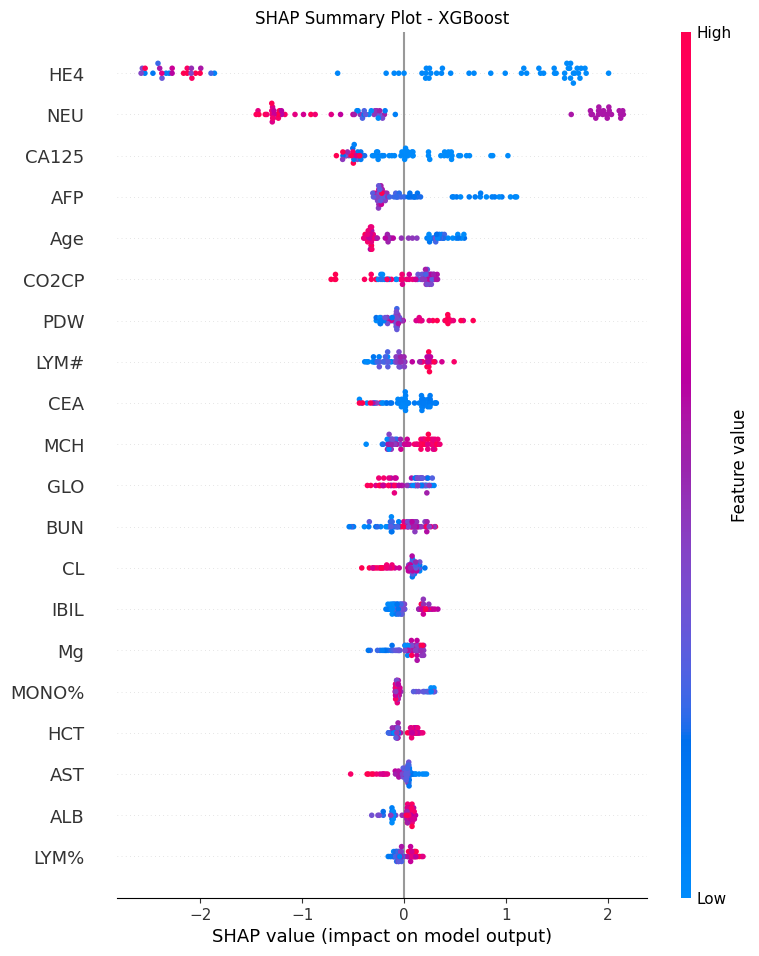

/tmp/ipython-input-3185072122.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lgbm, X_test, show=False)


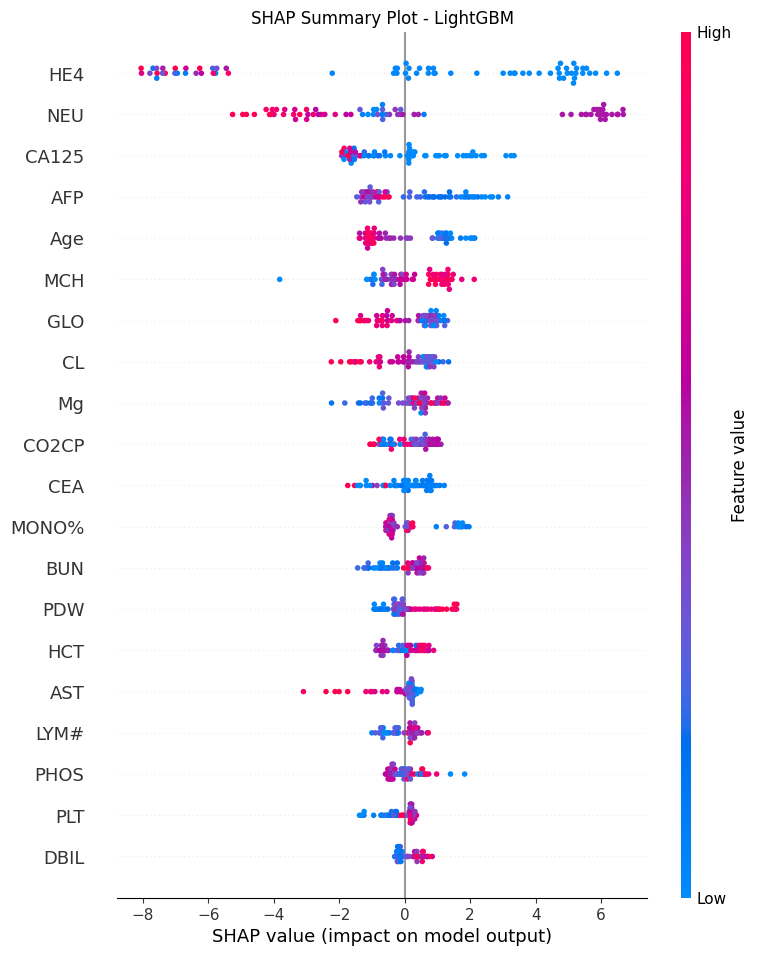

/tmp/ipython-input-3185072122.py:24: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_svm, X_test, show=False)


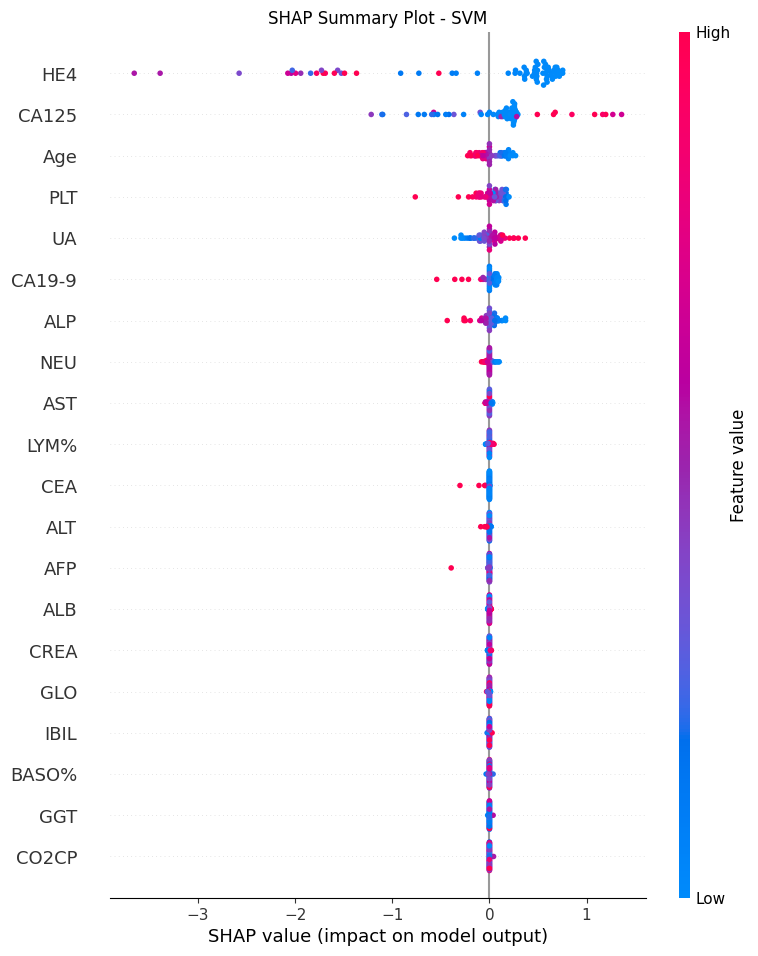

/tmp/ipython-input-3185072122.py:32: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_nn_plot, X_test, show=False)


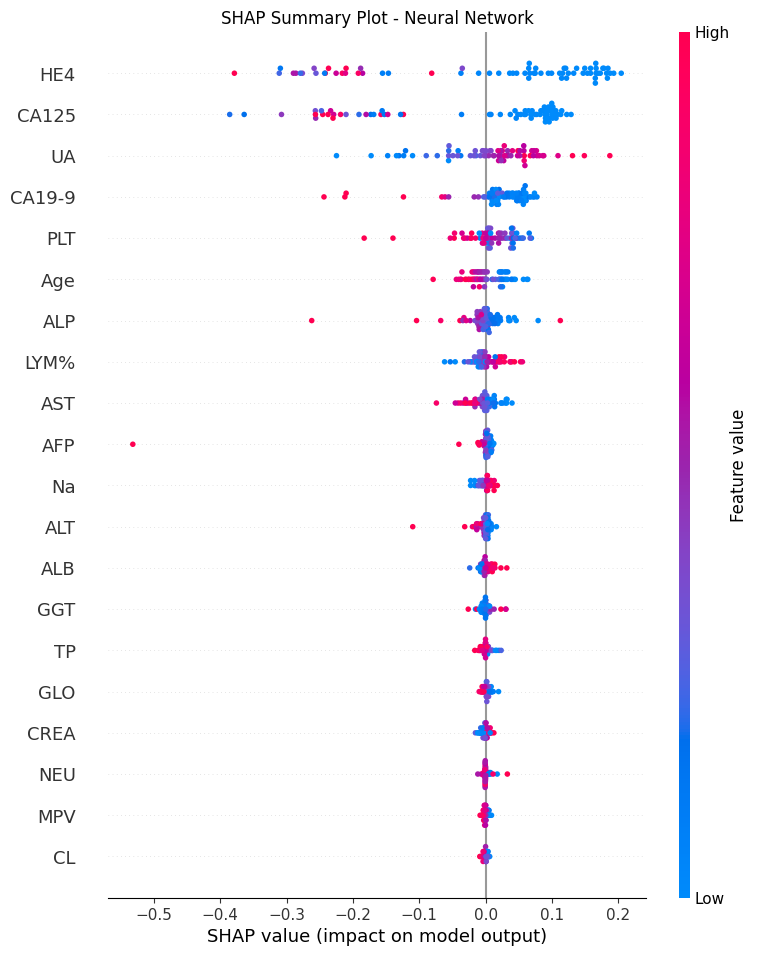

In [ ]:
# SHAP summary plots

# 1. Logistic Regression
shap.summary_plot(shap_values_lr, X_test, show=False)
plt.title('SHAP Summary Plot - Logistic Regression')
plt.show()

# 2. Tuned Random Forest
shap.summary_plot(shap_values_rf, X_test, show=False)
plt.title('SHAP Summary Plot - Random Forest')
plt.show()

# 3. XGBoost
shap.summary_plot(shap_values_xgb, X_test, show=False)
plt.title('SHAP Summary Plot - XGBoost')
plt.show()

# 4. LightGBM
shap.summary_plot(shap_values_lgbm, X_test, show=False)
plt.title('SHAP Summary Plot - LightGBM')
plt.show()

# 5. SVM
shap.summary_plot(shap_values_svm, X_test, show=False)
plt.title('SHAP Summary Plot - SVM')
plt.show()

# 6. Neural Network
shap_values_nn_plot = shap.Explanation(values=shap_values_nn.values,# New Explanation object was needed for plotting
                                       base_values=shap_values_nn.base_values,
                                       data=X_test)
shap.summary_plot(shap_values_nn_plot, X_test, show=False)
plt.title('SHAP Summary Plot - Neural Network')
plt.show()

**Feature Importance from Random Forest, XGBoost, and LightGBM.**

In [ ]:
# Get feature importances from the trained tree-based models
rf_feature_importances = best_rf_model.feature_importances_
xgb_feature_importances = best_xgb_model.feature_importances_
lgbm_feature_importances = best_lgbm_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create DataFrames for better visualization
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances})
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importances})
lgbm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': lgbm_feature_importances})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values('Importance', ascending=False)
xgb_importance_df = xgb_importance_df.sort_values('Importance', ascending=False)
lgbm_importance_df = lgbm_importance_df.sort_values('Importance', ascending=False)

# Display the top 10 most important features for each model
print("Top 10 Feature Importances - Random Forest:")
display(rf_importance_df.head(10))

print("\nTop 10 Feature Importances - XGBoost:")
display(xgb_importance_df.head(10))

print("\nTop 10 Feature Importances - LightGBM:")
display(lgbm_importance_df.head(10))

Top 10 Feature Importances - Random Forest:


,Feature,Importance
23,HE4,0.190075
11,CA125,0.089530
35,NEU,0.083304
2,Age,0.069684
3,ALB,0.031564
27,LYM%,0.026832
4,ALP,0.026724
13,CEA,0.025075
36,PCT,0.025017
39,PLT,0.024545



Top 10 Feature Importances - XGBoost:


,Feature,Importance
23,HE4,0.093266
35,NEU,0.079896
3,ALB,0.071250
36,PCT,0.068791
11,CA125,0.053593
40,RBC,0.046210
2,Age,0.036808
33,MPV,0.033662
38,PHOS,0.031237
39,PLT,0.027125



Top 10 Feature Importances - LightGBM:


,Feature,Importance
23,HE4,121
35,NEU,114
0,AFP,66
11,CA125,64
2,Age,53
30,Mg,50
28,MCH,49
15,CO2CP,47
13,CEA,45
37,PDW,44


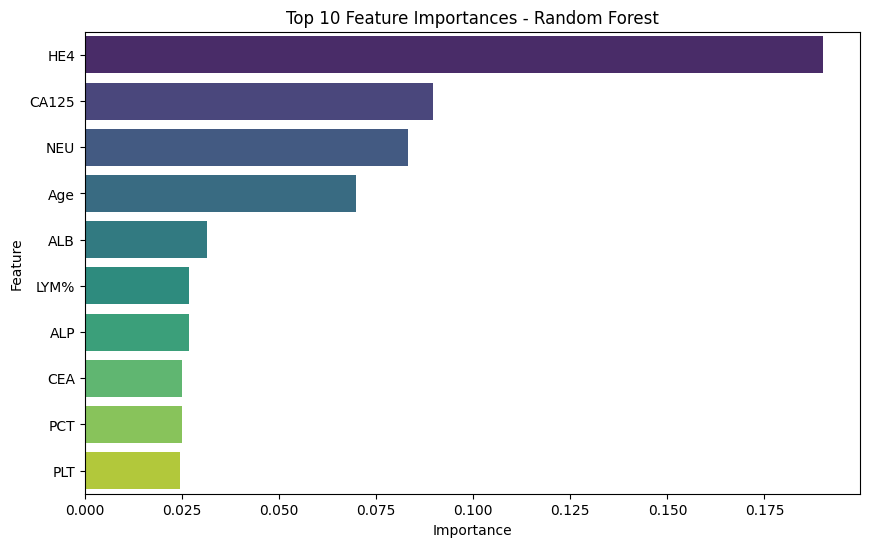

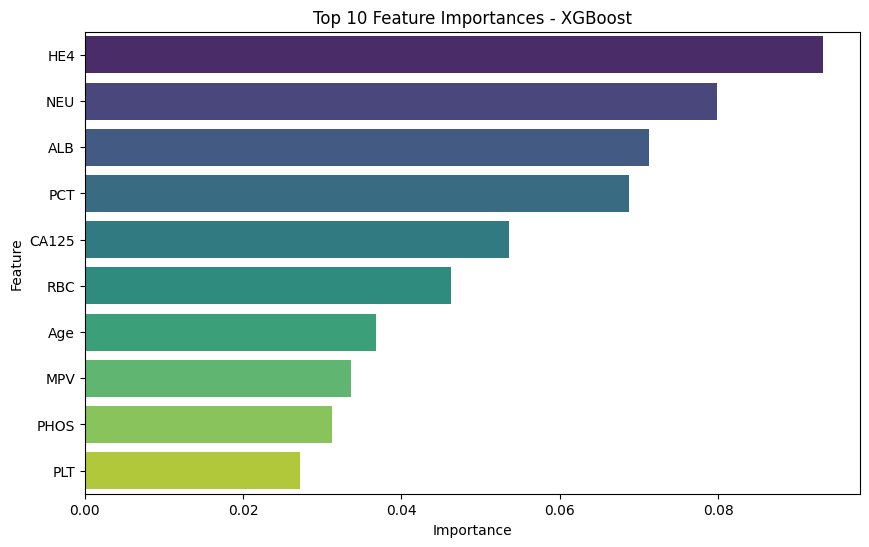

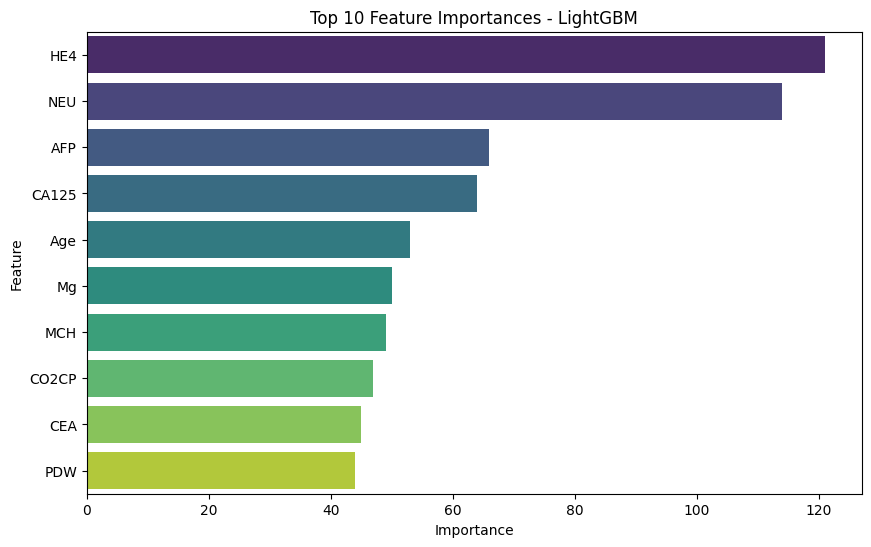

In [ ]:
# Plotting the top 10 most important features for each model

# Random Forest Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# XGBoost Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# LightGBM Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_importance_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Risk Stratification**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


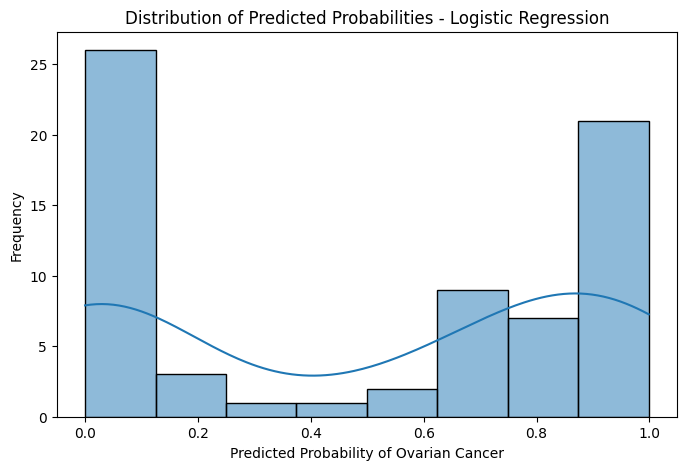

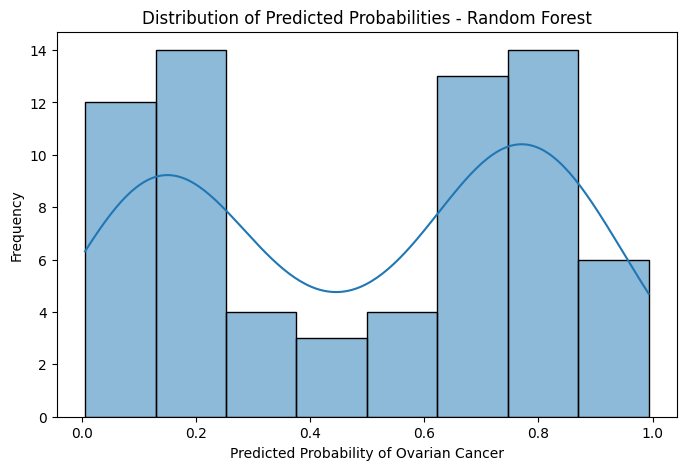

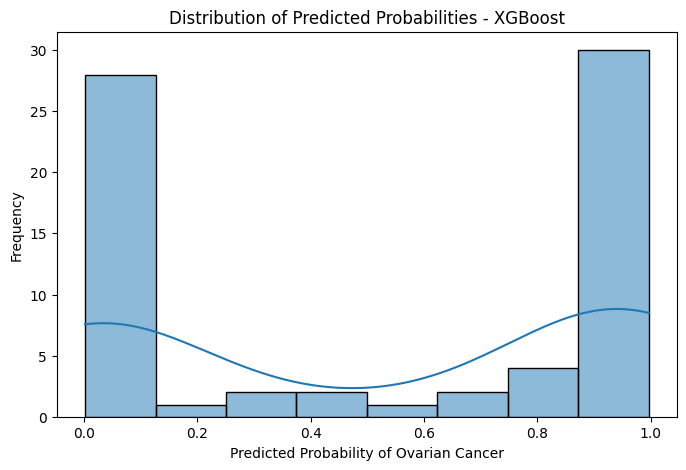

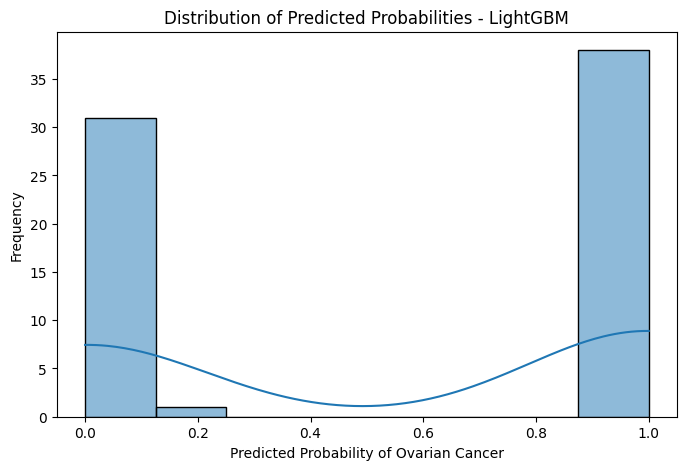

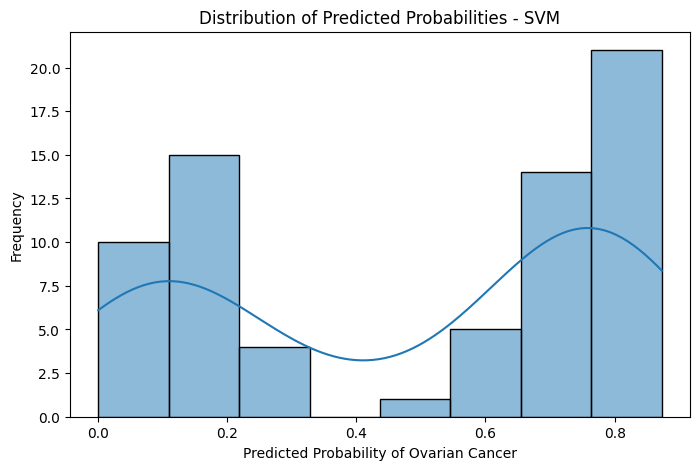

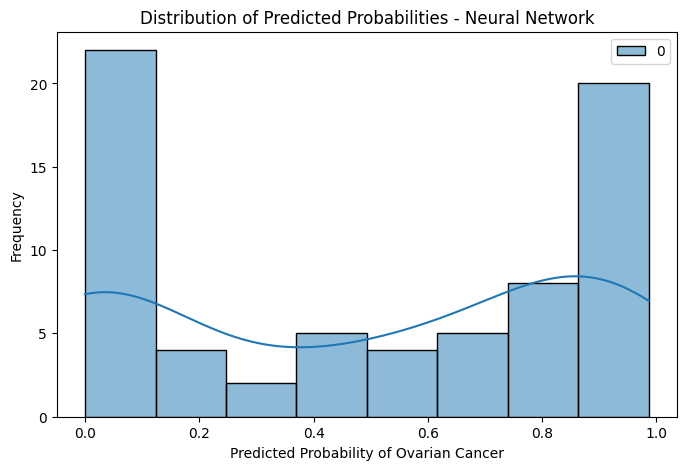

In [ ]:
# Distribution of predicted probabilities for each model
# Predicted probabilities from each model
y_pred_proba_lr = model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_proba_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]
y_pred_proba_svm = best_svm_model.predict_proba(X_test)[:, 1]
y_pred_proba_nn = model_nn.predict(X_test).ravel()


models_proba = {
    'Logistic Regression': y_pred_proba_lr,
    'Random Forest': y_pred_proba_rf,
    'XGBoost': y_pred_proba_xgb,
    'LightGBM': y_pred_proba_lgbm,
    'SVM': y_pred_proba_svm,
    'Neural Network': y_pred_nn_proba
}

for name, proba in models_proba.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(proba, kde=True)
    plt.title(f'Distribution of Predicted Probabilities - {name}')
    plt.xlabel('Predicted Probability of Ovarian Cancer')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Predicted probabilities for the having OC (TYPE=0) using Random Forest model
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 0]

# DataFrame for analysis of probabilities
results_df = pd.DataFrame({
    'Actual_Type': y_test,
    'Predicted_Probability_OC': y_pred_proba
})

# Separating probabilities for actual ovarian cancer (TYPE=0) and benign cases (TYPE=1)
proba_oc = results_df[results_df['Actual_Type'] == 0]['Predicted_Probability_OC']
proba_benign = results_df[results_df['Actual_Type'] == 1]['Predicted_Probability_OC']

print("\nPredicted Probability Distribution for Actual Ovarian Cancer (TYPE=0)")
print(proba_oc.describe())

print("\nPredicted Probability Distribution for Actual Benign Ovarian Tumor (TYPE=1)")
print(proba_benign.describe())


Predicted Probability Distribution for Actual Ovarian Cancer (TYPE=0)
count    34.000000
mean      0.798197
std       0.176459
min       0.202143
25%       0.765917
50%       0.847833
75%       0.890589
max       0.995000
Name: Predicted_Probability_OC, dtype: float64

Predicted Probability Distribution for Actual Benign Ovarian Tumor (TYPE=1)
count    36.000000
mean      0.239948
std       0.131911
min       0.006667
25%       0.154565
50%       0.234655
75%       0.293673
max       0.574500
Name: Predicted_Probability_OC, dtype: float64


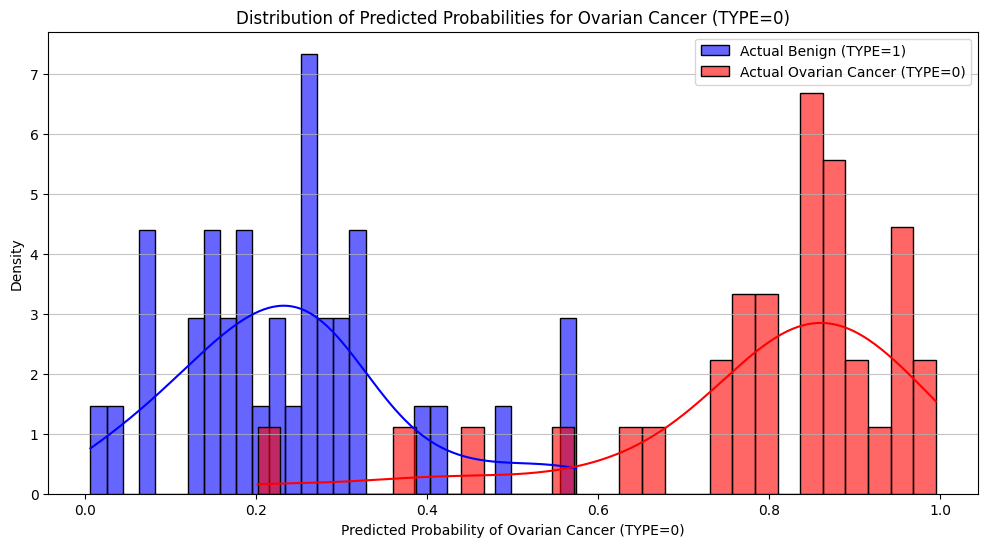

In [ ]:
# Distribution of predicted probabilities
plt.figure(figsize=(12, 6))
sns.histplot(proba_benign, color='blue', label='Actual Benign (TYPE=1)', kde=True, stat='density', alpha=0.6, bins=30)
sns.histplot(proba_oc, color='red', label='Actual Ovarian Cancer (TYPE=0)', kde=True, stat='density', alpha=0.6, bins=30)
plt.title('Distribution of Predicted Probabilities for Ovarian Cancer (TYPE=0)')
plt.xlabel('Predicted Probability of Ovarian Cancer (TYPE=0)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
def classify_risk(probability):
    if probability >= threshold_medium_to_high:
        return 'High Risk'
    elif probability >= threshold_low_to_medium:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Define thresholds for risk classification
threshold_low_to_medium = 0.3
threshold_medium_to_high = 0.75

# Risk classification to the predicted probabilities
results_df['Predicted_Risk_Category'] = results_df['Predicted_Probability_OC'].apply(classify_risk)

print(f"\nRisk Category Distribution (Thresholds: Low < {threshold_low_to_medium} <= Medium < {threshold_medium_to_high} <= High)")
print(results_df['Predicted_Risk_Category'].value_counts())

print("\nClassified Patients (Actual Type vs. Predicted Risk Category")
print(results_df[['Actual_Type', 'Predicted_Risk_Category']].head(10))


Risk Category Distribution (Thresholds: Low < 0.3 <= Medium < 0.75 <= High)
Predicted_Risk_Category
Low Risk       29
High Risk      26
Medium Risk    15
Name: count, dtype: int64

Classified Patients (Actual Type vs. Predicted Risk Category
     Actual_Type Predicted_Risk_Category
175            1                Low Risk
271            1                Low Risk
173            1             Medium Risk
257            0               High Risk
196            1                Low Risk
204            1             Medium Risk
102            0               High Risk
71             0               High Risk
172            1             Medium Risk
245            0               High Risk


In [ ]:
binary_threshold_for_evaluation = 0.30
y_pred_binary_classified = (y_pred_proba >= binary_threshold_for_evaluation).astype(int)

print(f"\nBinary Classification Performance (Threshold = {binary_threshold_for_evaluation})")
print("Confusion Matrix:")
# Labels for confusion matrix: 0 (Ovarian Cancer), 1 (Benign Ovarian Tumor)
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred_binary_classified, labels=labels)
print(pd.DataFrame(cm, index=[f'Actual {label}' for label in labels], columns=[f'Predicted {label}' for label in labels]))

print("\nClassification Report:")

target_names = ['Ovarian Cancer (0)', 'Benign Ovarian Tumor (1)']
print(classification_report(y_test, y_pred_binary_classified, target_names=target_names))


Binary Classification Performance (Threshold = 0.3)
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0            1           33
Actual 1           28            8

Classification Report:
                          precision    recall  f1-score   support

      Ovarian Cancer (0)       0.03      0.03      0.03        34
Benign Ovarian Tumor (1)       0.20      0.22      0.21        36

                accuracy                           0.13        70
               macro avg       0.11      0.13      0.12        70
            weighted avg       0.12      0.13      0.12        70



In [ ]:
binary_threshold_for_evaluation = 0.75
y_pred_binary_classified = (y_pred_proba >= binary_threshold_for_evaluation).astype(int)

print(f"\nBinary Classification Performance (Threshold = {binary_threshold_for_evaluation})")
print("Confusion Matrix:")
# Labels for confusion matrix: 0 (Ovarian Cancer), 1 (Benign Ovarian Tumor)
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred_binary_classified, labels=labels)
print(pd.DataFrame(cm, index=[f'Actual {label}' for label in labels], columns=[f'Predicted {label}' for label in labels]))

print("\nClassification Report:")

target_names = ['Ovarian Cancer (0)', 'Benign Ovarian Tumor (1)']
print(classification_report(y_test, y_pred_binary_classified, target_names=target_names))


Binary Classification Performance (Threshold = 0.75)
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0            8           26
Actual 1           36            0

Classification Report:
                          precision    recall  f1-score   support

      Ovarian Cancer (0)       0.18      0.24      0.21        34
Benign Ovarian Tumor (1)       0.00      0.00      0.00        36

                accuracy                           0.11        70
               macro avg       0.09      0.12      0.10        70
            weighted avg       0.09      0.11      0.10        70

